# <span style="color:orange">Исследование рынка российского кинопроката

<div style="border:solid Orange 2px; padding: 40px">  
    
**Заказчик исследования:** Министерство культуры Российской Федерации.
    
**Цель:** Выявить текущие тренды.

**Задачи:** 
1. Изучить рынок российского кинопроката и выявить текущие тренды.
2. Изучить данные по фильмам с государственной поддержкой, выявить насколько такие фильмы интересны зрителю.
    
**Исходные данные:** данные, опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

- Таблица  `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах. 

**Описание данных:**

<span style="color:orange">1. Таблица  `mkrf_movies`
   
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки (возвращают средства государству после проката фильма);
- `nonrefundable_support` — объём невозвратных средств государственной поддержки (выделяются безвозмездно);
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

<span style="color:orange">2. Таблица `mkrf_shows`

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

## <span style="color:orange"> Общая информация

In [1]:
# Импорт библиотек
import pandas as pd
from io import BytesIO
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Загрузим данные из таблиц `mkrf_movies` и `mkrf_shows`

In [2]:
#1.Импорт таблицы 'mkrf_movies' и сохранение в датафрейм
#https://docs.google.com/spreadsheets/d/1Og8BNvwh6E05YIc_ZIZezF0zonesM5veNucJ7pdgI7U/edit?gid=1984270536#gid=1984270536 
spreadsheet_id = '1Og8BNvwh6E05YIc_ZIZezF0zonesM5veNucJ7pdgI7U'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df_movies = pd.read_csv(BytesIO(r.content))
df_movies.head() #Выводим первые 5 строчек датафрейма

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,1001 рецепт влюбленного кулинара,1811096,2010-12-23T12:00:00.000Z,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия"
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14T12:00:00.000Z,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"комедия,военный"
2,И не было лучше брата,111000111,2011-01-13T12:00:00.000Z,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,детектив
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16T12:00:00.000Z,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия"
4,Тайна перевала Дятлова,111000113,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика"


In [3]:
#2.Приведем столбец 'puNumber' в приличный вид
df_movies.rename(columns = {'puNumber':'pu_number'}, inplace = True)

In [4]:
#3.Выводим общую информацию датафрейма 'df_movies'
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

#### Промежуточный вывод
<div class="alert alert-info">    
Некорректный тип данных:

- `pu_number` (перед объединением таблиц мы приведем тип данных к целочисленному)
- `show_start_date`
- `ratings`
  
Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.
Пропуски:

- `film_studio`
- `production_country`
- `director`
- `producer`
  
- `age_restriction`
  
- `refundable_support`
- `nonrefundable_support`
- `budget`
- `financing_source`

- `ratings`
- `genres`


+В столбце `pu_number` есть некорректное значение - "нет". Исключим эту строку из датафрейма. Из-за нее мы не можем выполнять дальнейшие задачи.

In [5]:
#4.Импорт таблицы 'mkrf_shows' и сохранение в датафрейм
# https://docs.google.com/spreadsheets/d/1sELvJkTl0gMMBbstAnUFbWIOr_q3VfzADxpq8YvQ8KY/edit?gid=467962526#gid=467962526
readsheet_id = '1sELvJkTl0gMMBbstAnUFbWIOr_q3VfzADxpq8YvQ8KY'
f_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(readsheet_id)
req = requests.get(f_name)
df_shows = pd.read_csv(BytesIO(req.content))
df_shows.head() #Выводим первые 5 строчек датафрейма

,puNumber,box_office
0,111013215,9977812.50
1,121006217,9968340.00
2,121008415,996669.00
3,121018116,99530233.94
4,121020216,9948422.07


In [6]:
#5.Приведем столбец 'puNumber' в приличный вид
df_shows.rename(columns = {'puNumber':'pu_number'}, inplace = True)

In [7]:
#6.Выводим общую информацию датафрейма 'df_shows'
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pu_number   3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
#7.Проверим на наличие посторонних строк, символов и т.д. столбец 'pu_number'
df_movies[df_movies['pu_number'].str.isdigit() == False]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
7485,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#8.Исключим строку с некорректным значением из датафрейма
df_movies.drop(labels=[7485], axis=0, inplace=True)
#df_movies['pu_number'] = pd.to_numeric(df_movies['pu_number'])

In [10]:
#9.Изменим тип на целочисленный (необходимо для дальнейшего объединения таблиц)
df_movies['pu_number'] = df_movies['pu_number'].astype(int)
df_movies['pu_number'].dtype # проверяем

dtype('int64')

In [11]:
#10.Объединим два датафрейма
data = df_movies.merge(df_shows, on='pu_number', how='left')
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,1001 рецепт влюбленного кулинара,1811096,2010-12-23T12:00:00.000Z,Художественный,"Ле Фильм дю Риваж, Ля Сет Синема, Адам и Ева, ...",Франция-Грузия-Германия-Россия-Украина-Бельгия,Н.Джорджадзе,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"мелодрама,комедия",NaN
1,Небесный тихоход (новая цветная версия),111000110,2010-01-14T12:00:00.000Z,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.0,"комедия,военный",NaN
2,И не было лучше брата,111000111,2011-01-13T12:00:00.000Z,Художественный,"ООО ""Ибрус"" при поддержке Киностудии ""Азербай...",Россия - Азербайджан,М.Ибрагимбеков,"М.Ибрагимбеков, А.Швыдкой, Д.Шуфутинский",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.7,детектив,NaN
3,"Детский юмористический киножурнал ""Ералаш"", вы...",111000112,2012-01-16T12:00:00.000Z,Художественный,"ООО ""Ералаш""",Россия,"В.Панжев, Г.Курлаев, И.Белостоцкий, М.Сулейман...","ООО ""Ералаш""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
4,Тайна перевала Дятлова,111000113,2013-01-17T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Ренни Харлин,"А.Роднянский, С.Мелькумов, С.Беспалов, Киа Джэм",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"ужасы,фантастика",2450.0


In [12]:
#11.Посмотрим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Общий вывод по разделу
<div class="alert alert-info"> 

- На данном этапе мы объединили 2 файла с даннымии по уникальному номеру прокатного удостоверения;
- В названии колоноки `'puNumber'` — расхождения с хорошим стилем. Заменили на `'pu_number'`
- Изменили тип в столбце `'pu_number'`на целочисленный;
- В каждой строке таблицы — данные о фильме, который вышел в прокат.

Часть колонок описывает сам фильм: номер прокатного удостоверения, название, дата премьеры, тип, студия-производ тель, страна производитель, режиссер, продюссер, возрастная категория, рейтинг фильма на Кинопоиске, жанр. 

Остальные данные рассказывают о финансовой стороне: объем возвратных средств, объем невозвратных средств, сборы в рублях, общий бюджет фильма (сумма возвратных, невозвратных и средства из иных источников).
- Всего таблица содержит данные о 7485 фильмов (строк), описание которых состоит из 16 столбцов.

Столбцы, в которых сменим тип в следующем разделе:
- `show_start_date` на datetime т.к. это дата
- `ratings` на float т.к. это дробное число


Предварительно можно утверждать, что данных достаточно для проверки гипотез. Но встречаются пропуски в данных.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## <span style="color:orange"> Предоработка данных

In [13]:
# Проверим перечень названий столбцов таблицы data (если есть пробелы то поправим)
print(data.columns)

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office'],
      dtype='object')


<div style="border:solid Orange 1px; padding: 5px">  
С названиями столбцов все в порядке.

### Преобразование типов данных


In [14]:
#1.Преобразуем тип данных в столбце 'show_start_date'
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%d' 'T12:00:00.000Z')
data['show_start_date'].head()

0   2010-12-23
1   2010-01-14
2   2011-01-13
3   2012-01-16
4   2013-01-17
Name: show_start_date, dtype: datetime64[ns]

In [15]:
#2.Посмотрим уникальные значения в солбце 'ratings', 
#чтобы наглядно увидеть причину, по которой на данном этапе не можем измениьть тип данных
data['ratings'].unique()

array(['6.7', '8.0', '7.2', '5.1', '6.1', '5.8', '3.2', '5.3', '6.6',
       '7.3', '3.0', '7.5', '5.4', nan, '5.0', '4.0', '5.9', '4.7', '6.9',
       '6.0', '7.1', '4.5', '4.3', '3.3', '6.8', '5.7', '4.9', '2.8',
       '3.9', '6.2', '6.4', '7.6', '1.9', '6.5', '7.0', '4.8', '99%',
       '4.2', '5.2', '3.8', '3.1', '6.3', '1.5', '4.4', '7.7', '5.6',
       '8.2', '7.4', '3.7', '2.6', '5.5', '7.8', '4.1', '91%', '2.9',
       '8.1', '3.4', '4.6', '7.9', '8.5', '98%', '3.5', '94%', '1.4',
       '8.4', '8.8', '79%', '1.7', '3.6', '2.7', '2.4', '2.5', '8.3',
       '83%', '1.2', '8.7', '1.6', '1.1', '62%', '9.2', '1.0', '89%',
       '90%', '2.1', '8.6', '1.3', '28%', '97%', '9.0', '64%', '88%',
       '8.9', '9.1', '19%', '1.8'], dtype=object)

#### Промежуточный вывод
<div class="alert alert-info"> 
    
- Во-первых, мы видим процентные значения рейтинга, что не есть хорошо. Приведем в общий вид (убрав знак процента и разделив это значение на 10)
- Во-вторых, мы видим nan (кол-во: 967; пропускам уделим внимание позже) 

In [16]:
#2.1 Находим элементы столбца ratings, в которых есть знак '%' и заменяем его на на пустое значение
data['ratings'] = data['ratings'].str.replace('%', '')
#2.2 Меняем тип данных на float, чтобы выполнить арефметическое выражение
data['ratings'] = data['ratings'].astype('float') 
#2.3 Выбираем строки, в которых значения больше 10. Это наши значения с убранными знаками '%'
new_ratings = data.loc[data['ratings'] > 10]
#2.4 Перезаписываем в эти строки корректные значения(т.е. делим на 10 - приводим к общему виду)
data.loc[data['ratings'] > 10, 'ratings'] = new_ratings['ratings'] / 10
data['ratings'].unique() # проверяем

array([6.7, 8. , 7.2, 5.1, 6.1, 5.8, 3.2, 5.3, 6.6, 7.3, 3. , 7.5, 5.4,
       nan, 5. , 4. , 5.9, 4.7, 6.9, 6. , 7.1, 4.5, 4.3, 3.3, 6.8, 5.7,
       4.9, 2.8, 3.9, 6.2, 6.4, 7.6, 1.9, 6.5, 7. , 4.8, 9.9, 4.2, 5.2,
       3.8, 3.1, 6.3, 1.5, 4.4, 7.7, 5.6, 8.2, 7.4, 3.7, 2.6, 5.5, 7.8,
       4.1, 9.1, 2.9, 8.1, 3.4, 4.6, 7.9, 8.5, 9.8, 3.5, 9.4, 1.4, 8.4,
       8.8, 1.7, 3.6, 2.7, 2.4, 2.5, 8.3, 1.2, 8.7, 1.6, 1.1, 9.2, 1. ,
       8.9, 9. , 2.1, 8.6, 1.3, 9.7, 1.8])

In [17]:
data['ratings'].dtype #проверяем

dtype('float64')

#### Общий Вывод
<div class="alert alert-info"> 

- Сменили тип в столбце `show_start_date` на datetime т.к. это дата
- Сменили тип в столбце `ratings на float` т.к. это дробное число
- Привели в общий вид значения столбца `'ratings'` (убрав знак процента и разделив это значение на 10)
- Видим большое кол-во пропусков в столбцах.

Возможные причины пропусков, аномальных значений в данных изучим в следующем разделе.

###  Работа с пропусками


#### Изучим пропуски

In [18]:
#1.Выводим количество пропущенных значений для каждого столбца
print(data.isna().sum().sort_values(ascending=False))

refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
box_office               4327
genres                    975
ratings                   966
producer                  568
film_studio                18
director                    9
production_country          2
title                       0
pu_number                   0
show_start_date             0
type                        0
age_restriction             0
dtype: int64


In [19]:
# 2.Посмотрим процент пропусков по каждому столбцу
percent_nan = (data.isna().sum()/len(data)*100).round(1).sort_values(ascending=False)
percent_nan

refundable_support       95.6
nonrefundable_support    95.6
budget                   95.6
financing_source         95.6
box_office               57.8
genres                   13.0
ratings                  12.9
producer                  7.6
film_studio               0.2
director                  0.1
title                     0.0
pu_number                 0.0
show_start_date           0.0
type                      0.0
production_country        0.0
age_restriction           0.0
dtype: float64

In [20]:
#3.Глянем средний процент пропусков
mean_percent_nan = percent_nan.mean().round(1)
print(mean_percent_nan)

29.6


#### Промежуточный вывод
<div class="alert alert-info"> 
    
- Здоровенненький такой процентик получается - `29.6%`. Будем искать причины и устранять на сколько это возможно.
- Видим одинакое кол-во пропусков в столбцах (по 7154):
   
`financing_source`,
`budget`,
`nonrefundable_support`,
`refundable_support`.
Данные в этих столбцах, похоже, и есть фильмы с государственной поддержкой, которые мы позже детально рассмотрим.

####  Рассмотрим процент пропусков в данных с возможными причинами

<div style="border:solid Orange 2px; padding: 15px">

1. `financing_source` - источник государственного финансирования   

**Пропуски:** <span style="color:red">95.6%

- Возможно, источник финансирования не государство (например, частное лицо);
- Или фильм снят за рубежом.

*Заполним*, например, `unknown` (частный инвестор/спонсор/киностудия/развлекательной компании/личные средства)


2. `budget` - общий бюджет фильма

**Пропуски:** <span style="color:red">95.6%

- Возможно, источник финансирования не государство 

Также в данном столбце есть нулевые значения в фильмах с господдержкой (что указывает на возможную ошибку; т.к. столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку).

Поэтому *оставим без изменений* основную чась пропусков. Но поработаем с нулеевым значениями в фильмах с господдержкой: *заменим нулевые значения* на сумму возвратных, невозвратных и медианы разницы бюджета и возратных+невозвратных средств).
  
3. `nonrefundable_support` — объём невозвратных средств государственной поддержки (выделяются безвозмездно)

**Пропуски:** <span style="color:red">95.6%

- Возможно, источник финансирования не государство (например, частное лицо);
- Или фильм снят за рубежом.

*Оставляем* без изменений.


4. `refundable_support` - объём возвратных средств государственной поддержки (возвращают средства государству после проката фильма)               
**Пропуски:** <span style="color:red">95.6%

- Возможно, источник финансирования не государство (например, частное лицо);
- Фильм снят за рубежом.

*Оставляем* без изменений. 


5. `box_office` - сборы в рублях                       

**Пропуски:** <span style="color:red">57.8%

- Возможно, показ был бесплатный
- Возможно, была ошибка в фиксации и получении данных. 

*Оставляем* пропуски без изменений.


6. `genres` - жанр фильма                           

**Пропуски:** <span style="color:red">13.0%

*Заполним* значением `unknown`


7. `ratings` - рейтинг фильма на КиноПоиске                         

**Пропуски:** <span style="color:red">12.9%

*Оставляем* пропуски. Возможно, что к фильмам не поставили оценку или оценок набралось недостаточное кол-во для рейтинга


8. `producer` - продюсер                          

**Пропуски:** <span style="color:green">7.6%

*Заполним* значением `unknown`


9. `film_studio` - студия-производитель                       

**Пропуски:** <span style="color:green">0.2%

Так как пропуски малочислены и малозначимы, то *заполним* значением `unknown`.


10. `director` - режиссёр                          

**Пропуски:** <span style="color:green">0.1%

Так как пропуски малочислены и малозначимы, то *заполним* значением `unknown`.


#### Заполним пропущенные значения там, где это возможно

- В столбце `'production_country'` проставим значения

In [21]:
# Посмотрим пропуски в столбце
data.loc[data['production_country'].isna()]
# Заполним пропуски в столбце ручками
data.loc[data['production_country'].isna(), 'production_country'] = \
data.loc[data['production_country'].isna(), 'production_country'].fillna('Россия')

- Заменяем пропущенные значения на `'unknown'` в столбцах `'genres'`, `'producer'`, `'film_studio'`, `'director'`, `'financing_source'`

In [22]:
columns_to_replace = ['genres', 'producer', 'film_studio', 'director', 'financing_source']
for columns in columns_to_replace:
    data[columns] = data[columns].fillna('unknown')

- В столбце `'budget'` заменим нулевые значения

In [23]:
# Создадим вспомогательный столбец 'priv_inv'
data['priv_inv'] = (data['budget'] - data['nonrefundable_support'] - data['refundable_support']).median() # медиана по сторонним инвестициям
index_list = [] #Создадим пусой лист
index_list.extend(data.loc[data['budget'] == 0].index.to_list())

for index in index_list:
    data.loc[index, 'budget'] = data.loc[index, 'nonrefundable_support'] + data.loc[index, 'refundable_support'] + data.loc[index, 'priv_inv']


In [24]:
# Проверка. Кол-во значений с нулевым бюджетом
len(data.loc[data['budget'] == 0])

0

In [25]:
percent_nan_new = (data.isna().sum()/len(data)*100).round(1).sort_values(ascending=False)
percent_nan_new

refundable_support       95.6
budget                   95.6
nonrefundable_support    95.6
box_office               57.8
ratings                  12.9
title                     0.0
genres                    0.0
financing_source          0.0
age_restriction           0.0
pu_number                 0.0
producer                  0.0
director                  0.0
production_country        0.0
film_studio               0.0
type                      0.0
show_start_date           0.0
priv_inv                  0.0
dtype: float64

In [26]:
mean_percent_nan_new = percent_nan_new.mean().round(1)
print(f'Средний процент пропусков уменьшился до {mean_percent_nan_new}')

Средний процент пропусков уменьшился до 21.0


#### Общий вывод
<div class="alert alert-info"> 
    
В столбце `'production_country'` проставили значения "Россия"

Заменили пропущенные значения на `'unknown'` в столбцах `'genres'`, `'producer'`, `'film_studio'`, `'director'`, `'financing_source'`

В столбце `'budget'` заменили нулевые значения

`Средний процент пропусков уменьшился до 21%`

### Проверим данные на дубликаты


In [27]:
#1.Посмотрим есть ли явные дубликаты
print('\nКол-во дубликатов:', data.duplicated().sum())


Кол-во дубликатов: 0


<div style="border:solid Orange 1px; padding: 20px">  
Как мы знаем, у одного фильма может быть несколько прокатных удостоверений, что объясняет возможные дубликаты в столбцах.
НО! Не в столбце `pu_number`. В нем точно должны быть уникальные значения. Поэтому проверим данный столбец.

In [28]:
#2.Проверим на дубликаты столбец 'pu_number'. Так как здесь значения должны быть уникальными
data.loc[data['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,priv_inv
6889,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.8,"комедия,криминал",NaN,31166197.0
7290,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.6,"драма,мелодрама,история",NaN,31166197.0


<div style="border:solid Orange 1px; padding: 10px">  
Обнаружено 2 неявных дубликата.

In [29]:
# 1.Поработаем с первым дубликатом
data.loc[(data['pu_number'] == 221154310)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,priv_inv
7289,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.0,"мелодрама,комедия",NaN,31166197.0
7290,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.6,"драма,мелодрама,история",NaN,31166197.0


<div style="border:solid Orange 1px; padding: 10px">  
Видим, что это явно ошибка - фильмы разные. Поэтому заменим проканое удостоверение на уникальное (придумаем свое, так как данный столбец используется как индекс).

In [30]:
# 1.1 Заменим значение прокатного удостоверения по первому дубликату на уникальное
data.loc[(data['title'] == 'Как жениться и остаться холостым') & (data['pu_number'] == 221154310), 'pu_number'] = 221154311

In [31]:
# 2.Поработаем со вторым дубликатом
data.loc[(data['pu_number'] == 221054410)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,priv_inv
6888,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,unknown,7.4,"комедия,криминал",NaN,31166197.0
6889,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,unknown,6.8,"комедия,криминал",NaN,31166197.0


<div style="border:solid Orange 1px; padding: 10px">  
Здесь также видим, что это явно ошибка - фильмы разные. Поэтому заменим проканое удостоверение на уникальное (придумаем свое, так как данный столбец используется как индекс).

In [32]:
# 2.1 Заменим значение прокатного удостоверения по второму дубликату на уникальное
data.loc[(data['title'] == 'Анализируй то!') & (data['pu_number'] == 221054410), 'pu_number'] = 221054411

In [33]:
len(data.loc[data['pu_number'].duplicated()])# проверяем

0

#### Общий вывод
<div class="alert alert-info"> 

- Явных дубликатов не обнаружено
- Найдено 4 дубликата в столбце с проканым удостоверением. Заменили прокатное удостоверение на свободное (можем так сделать так как в данном исследовании столбец используется в качестве индекса)

### Изучим столбцы, которые содержат категориальные значения


<div style="border:solid Orange 1px; padding: 1px">  
    
1. Посмотрим кол-во уникальных значений в каждом категориальном столбце

In [34]:
categorical_values = ['title', 'type', 'production_country', 'film_studio', 'director', 'producer', 'genres', 'age_restriction']
data[categorical_values].nunique()

title                 6771
type                     6
production_country     934
film_studio           5484
director              4802
producer              5344
genres                 743
age_restriction          5
dtype: int64

<div style="border:solid Orange 1px; padding: 1px">  
    
2. Изучим каждый столбцы отдельно

#### Столбец `title`

In [35]:
#Выведем кол-во уникальных значений в столбце 'title'
cnt_unique_title = data['title'].nunique()
print(f'Кол-во уникальных значений: {cnt_unique_title}')

Кол-во уникальных значений: 6771


#### Промежуточный вывод
<div class="alert alert-info"> 
    
В столбце `'title'` очень грязные данные, что сказывается на кол-ве уникальных значений.

Вот основные виды и примеры:

- точки/многоточия/решетка/!?!/- до или после названия `10 лет спустя. ; ... в стиле JAZZ; #ВСЁ_ИСПРАВИТЬ!?! ; Ворон-`
- нижние подчеркивания/точки и пробелы `Ангел _; Ведьма .`
- Капс `БИРМИНГЕМСКИЙ ОРНАМЕНТ`
- Заглавные и строчны буквы (Атлантида: `З`атерянный мир
Атлантида: `з`атерянный мир)
- Дублирование по английски через слеш `Аутло/Outlaw`
- Год фильма/название/с на английском в скобках `Ближе, чем кажется (2017); Бэст Сай-Фай (Best Sci-Fi)`
- Серии/описание `Вне Игры (серии 1-12); Заячья школа (цифровой DCP, объем 2D - 100 Гб, 3D - 170 Гб)`
- Дополнительное пояснение к названию
`Буря /По одноименной пьесе У.Шекспира/; В тумане /По одноименной повести Василя Быкова/; В следующий раз я буду стрелять в сердце /По роману Ивана Стефановича "Убийца вне подозрений"/`
- Лишние пробелы `В поисках Дори.     Песочник`
- Возрастная категория `Викинг 18+`

Основная проблема: Лишние знаки (точки, запятые, тире, нижнее подчеркивание и т.д), лишние пробелы, разный стиль заполненных значений. Все это сказывается на уникальных значениях.

Не вижу смысла их поправлять, оставим как есть. 


#### Столбец `production_country`

In [36]:
# 1.Прежде, чем заменить некорректные значения, выведем кол-во уникальных значений
cnt_unique_production_country = data['production_country'].nunique()
print(f'Кол-во уникальных значений ДО: {cnt_unique_production_country}')

Кол-во уникальных значений ДО: 934


In [37]:
# 2.Заменим некорректные значения (чтобы каждая старна была перечислена через запятую без лишних символов/убраны лишние пробелы/заменены ошибки и т.д.)
data['production_country'] = (data['production_country']
                              .str.strip() # Уберем лишние пробелы
                              .str.replace(' -', ',') # Заменим пробел с дефисом на запятую
                              .str.replace('-', ', ') # Заменим дефис на запятую с пробелом
                              .str.replace(',', ', ') # Заменим запятую на запятую с пробелом
                              # Приведем к единым названиям, так сократим кол-во уникальных значений
                              .str.replace('Республика Кипр', 'Кипр')
                              .str.replace('Республика Беларусь', 'Беларусь')
                              .str.replace('Республика Узбекистан', 'Узбекистан')
                              .str.replace('Республика Армения', 'Армения')
                              .str.replace('Республика Казахстан', 'Казахстан')
                              .str.replace('Чешская Республика', 'Чехия')
                              .str.replace('Республика Корея', 'Южная Корея')
                              .str.replace('Ю.Корея', 'Южная Корея')
                              .str.replace('Н.Зеландия', 'Новая Зеландия')
                              .str.replace('Голландия', 'Нидерланды')
                              .str.replace('КНР', 'Китай')
                               # Поправим ошибки/опечатки
                              .str.replace('К;анада', 'Канада')
                              .str.replace('Порртугалия', 'Португалия')
                              .str.replace('Бенльгия', 'Бельгия')
                              .str.replace('Германя', 'Германия')
                              .str.replace('Норвения', 'Норвегия')
                               # Приведем к единому написанию аббревиатур
                              .str.replace('Объединенные Арабские Эмираты', 'ОАЭ')
                              .str.replace('Сша', 'США')
                             )

/tmp/ipykernel_221/677018078.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['production_country'] = (data['production_country']


In [38]:
# Каким-то образом попало значение года премьеры (2019) на месо страны (Германия). Заменим значение
data.loc[data['production_country'] == '2019', 'production_country'] = 'Германия' #data.loc[data['pu_number'] == 121027219]

# После тотального причесывания, поплыли "Пуэрто-Рико" и "Босния и Герцеговина", поправим это.

#Пуэрто-Рико
data.loc[(data['pu_number'] == 121010218), 'production_country'] = 'США, Пуэрто-Рико'
data.loc[(data['pu_number'] == 121010414), 'production_country'] = 'Великобритания, Пуэрто-Рико'
data.loc[(data['pu_number'] == 121013815), 'production_country'] = 'США, Россия, Польша, Германия, Пуэрто-Рико'
data.loc[(data['pu_number'] == 121022619), 'production_country'] = 'Пуэрто-Рико, Великобритания, США'
data.loc[(data['pu_number'] == 126005916), 'production_country'] = 'США, Пуэрто-Рико, Франция'
#США
data.loc[(data['pu_number'] == 121002115), 'production_country'] = 'США'
data.loc[(data['pu_number'] == 121018918), 'production_country'] = 'США'
#Южная Корея
data.loc[(data['pu_number'] == 121014110), 'production_country'] = 'Южная Корея'
data.loc[(data['pu_number'] == 121021517), 'production_country'] = 'Южная Корея'                            
#Босния и Герцеговина
data.loc[(data['pu_number'] == 221153510), 'production_country'] = 'США, Хорватия, Босния и Герцеговина'
data.loc[(data['pu_number'] == 121001812), 'production_country'] = 'Босния и Герцеговина, Франция, Великобритания, Германия, Словения, Бельгия, Сербия'

In [39]:
cnt_unique_production_country_new = data['production_country'].nunique()
print(f'Кол-во уникальных значений ПОСЛЕ: {cnt_unique_production_country_new}')

Кол-во уникальных значений ПОСЛЕ: 796


<div style="border:solid black 1px; padding: 10px">  
    
**Функция для добавления столбцов с первыми значениями в ячейках**

`first_value(датафрейм, [название столбца(ов) из которых извлекаются значения])`

In [40]:
def first_value(data, columns):
    for column in columns:
        data[f'first_{column}'] = data[column].str.split(',').str[0] # Добавим столбец с новым названием
    return data

<div style="border:solid black 1px; padding: 10px">  

**Столбцы, из которых извлечем первое значение, примем за основное:**

- `production_country`
- `film_studio`
- `director`
- `genres`
- `producer`


In [41]:
# 3.Выделим первое значение в столбце  `'production_country'`, 
#выделим его в отдельные столбик и посмотрим результат. Т.о. выявим уникальное (вычищенное) кол-во стран в данных.
data = first_value(data, ['production_country'])
cnt_first_production_country = data['first_production_country'].nunique()
print(f'Кол-во уникальных значений ФИНАЛЬНОЕ: {cnt_first_production_country}')

Кол-во уникальных значений ФИНАЛЬНОЕ: 75


In [42]:
data['first_production_country'].unique()
#data['first_production_country'].value_counts().head(30)

array(['Франция', 'СССР', 'Россия', 'Грузия', 'Азербайджан', 'Армения',
       'Кипр', 'США', 'Испания', 'Австрия', 'Великобритания', 'Швейцария',
       'Бельгия', 'Германия', 'Турция', 'Италия', 'Норвегия',
       'Португалия', 'Румыния', 'Иран', 'Мексика', 'Канада', 'Дания',
       'Китай', 'Австралия', 'Ливан', 'Израиль', 'Исландия', 'Япония',
       'Венгрия', 'Босния и Герцеговина', 'Индия', 'Ирландия', 'Таиланд',
       'Чили', 'Нидерланды', 'Аргентина', 'Гонконг', 'Финляндия',
       'Эстония', 'Бразилия', 'Швеция', 'Индонезия', 'Люксембург',
       'Греция', 'Казахстан', 'Литва', 'Южная Корея', 'Чехия',
       'Македония', 'Новая Зеландия', 'Польша', 'Сербия', 'ОАЭ', 'Кения',
       'Болгария', 'Венесуэла', 'ЮАР', 'Парагвай', 'Монголия', 'Украина',
       'Латвия', 'Хорватия', 'Сингапур', 'Уругвай', 'Пуэрто-Рико',
       'Беларусь', 'Колумбия', 'Перу', 'Малайзия', 'Пакистан', 'Киргизия',
       'Узбекистан', 'Княжество Андорра', 'Чехословакия'], dtype=object)

#### Промежуточный вывод
<div class="alert alert-info"> 

Основные устраненные проблемы:

- Убрали лишние пробелы/Заменили пробел с дефисом на запятую/Заменили дефис на запятую с пробелом/Заменили запятую на запятую с пробелом
- Привели к единым названиям, так сократили кол-во уникальных значений
- Заменили некорректное значение страны `с 2019 на Германия`
- Поправим ошибки/опечатки
- Приведем к единому написанию аббревиатур

Также добавили столбец с первыми значениями в ячейках `'first_production_country'`

#### Столбец `film_studio`

In [43]:
# 1.Выведем кол-во уникальных значений
cnt_unique_film_studio = data['film_studio'].nunique()
print(f'Кол-во уникальных значений ДО: {cnt_unique_film_studio}')

Кол-во уникальных значений ДО: 5484


In [44]:
# 2.Постараемся немного причесать, привести к наиболее единому стилю, чтобы выявить более корректное уникальное значение
data['film_studio'] = (data['film_studio']
                               .str.title()
                               .str.replace(',', ', ') # Заменим запятую на запятую с пробелом
                               # Уберем аббревиатуры 
                               .str.replace('Ооо','')
                               .str.replace('Ано','')
                               .str.replace('Зао','')
                               .str.replace('Акционерное общество','')
                               .str.replace('Aо','')
                               .str.replace('Фгуп','')
                               .str.replace('Тпо','')
                               # Уберем кавычки
                               .str.replace('"','')
                               .str.replace('"','') 
                               .str.strip() # Уберем лишние пробелы
                        )

In [45]:
cnt_unique_film_studio_new = data['film_studio'].nunique()
print(f'Кол-во уникальных значений ПОСЛЕ: {cnt_unique_film_studio_new}')

Кол-во уникальных значений ПОСЛЕ: 5400


In [46]:
# 4.Выделим первое значение в столбце  'film_studio', выделим его в отдельные столбик и посмотрим результат
data = first_value(data, ['film_studio'])
first_film_studio_nunique = data['first_film_studio'].nunique()
print(f'Уникальное кол-во студий: {first_film_studio_nunique}')

Уникальное кол-во студий: 3958


In [47]:
# 5.Выведем причесанные названия студий, заодно глянем кол-во значений по каждой
print(data['first_film_studio'].value_counts().head(20))

Киностудия Мосфильм                   368
Уорнер Бразерс                        240
Юниверсал Пикчерз                     162
Коламбиа Пикчерз                       87
Мульт В Кино                           75
Парамаунт Пикчерз                      71
Хх Век Фокс                            60
Нью Лайн Синема                        54
Уолт Дисней Пикчерз                    45
Студия Анимационного Кино Мельница     34
Гомон                                  31
Саммит Интертейнмент                   30
Анимаккорд Лтд                         28
Таббак                                 25
Дримуоркс Анимейшн                     24
Би-Би-Си                               21
Тачстоун Пикчерз                       21
Миллениум Филмз                        20
Unknown                                18
Метро Голдвин Майер                    18
Name: first_film_studio, dtype: int64


#### Промежуточный вывод
<div class="alert alert-info"> 

- Приведи к единому стилю
- Убрали лишние пробелы 
- Убрали аббревиатуры
- Выделили первое значение в столбце `'film_studio'`
- Добавили новый столбик `'first_first_studio'`

Сильно чистить данные в столбце не стала, так как в этом нет необходимости

<div style="background-color: #d4edda; border: 2px solid #c3e6cb; border-radius: 20px; padding: 15px 25px; display: inline-block; color: black;">

**Артём:** 👍 Отлично.

---

💬 Здесь можно оставить комментарий

#### Столбец `director`

In [48]:
# 1.Выведем кол-во уникальных значений
director_nunique = data['director'].nunique()
print(f'Кол-во уникальных значений ДО: {director_nunique}')

Кол-во уникальных значений ДО: 4802


In [49]:
# 2.Уберем лишние пробелы
data['director'] = data['director'].str.strip()        

In [50]:
# 3.Выделим первое значение в столбце 'director', выделим его в отдельные столбик и посмотрим результат
data = first_value(data, ['director'])
director_nunique_new = data['first_director'].nunique()
print(f'Кол-во уникальных значений ПОСЛЕ: {director_nunique_new}')

Кол-во уникальных значений ПОСЛЕ: 4603


In [51]:
# 4.Выведем причесанные значения, заодно глянем кол-во значений по каждому
data['first_director'].value_counts().head(10)

О.Семёнова          60
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
Вуди Аллен          13
Питер Джексон       13
Клинт Иствуд        13
Кевин Смит          12
Дэвид Финчер        12
Name: first_director, dtype: int64

#### Промежуточный вывод
<div class="alert alert-info"> 

- Убрали лишние пробелы
- Выделили первое значение в столбце  `'director'`
- Добавили новый столбик `'first_director'`
- Выведели причесанные имена режиссеров, заодно глянули кол-во значений по каждому
  
Сильно чистить данные в столбце не понадобилось

#### Столбец `producer`

In [52]:
# 1.Выведем кол-во уникальных значений
producer_nunique = data['producer'].nunique()
print(f'Кол-во уникальных значений ДО: {producer_nunique}')

Кол-во уникальных значений ДО: 5344


In [53]:
# 2.Причешем значения и выведем результат
data['producer'] = (data['producer']
                              .str.title()
                               .str.replace('Ооо','')
                               .str.replace('Ано','')
                               .str.replace('Зао','')
                               .str.replace('Aо','')
                       
                               .str.replace('"','')
                               .str.strip() # Уберем лишние пробелы
                      )

In [54]:
producer_nunique_new = data['producer'].nunique()
print(f'Кол-во уникальных значений: {producer_nunique_new}')

Кол-во уникальных значений: 5327


In [55]:
# 3.Выделим первое значение в столбце  `'producer'`, выделим его в отдельные столбик и посмотрим результат
data = first_value(data, ['producer'])
first_producer_nunique = data['first_producer'].nunique()
print(f'Кол-во уникальных значений ПОСЛЕ: {first_producer_nunique}')

Кол-во уникальных значений ПОСЛЕ: 4024


In [56]:
# 4.Выведем причесанные значения, заодно глянем кол-во значений по каждому
data['first_producer'].value_counts().head(10)

Unknown          568
П.Смирнов         67
Джейсон Блум      53
С.Сельянов        37
Тим Беван         28
Олег Кузовков     28
Д.Ловейко         23
Г.Малков          21
Т.Бекмамбетов     19
Люк Бессон        19
Name: first_producer, dtype: int64

#### Промежуточный вывод
<div class="alert alert-info"> 

- Убрали лишние пробелы
- Выделили первое значение в столбце  `'producer'`
- Добавили новый столбик `'first_producer'`
- Вывели причесанные имена продюссеров, заодно глянули кол-во значений по каждому
  
Сильно чистить данные в столбце не понадобилось

#### Столбец `genres`

In [57]:
# 1.Выведем кол-во уникальных значений
genres_nunique = data['genres'].nunique()
print(f'Кол-во уникальных значений ДО: {genres_nunique}')

Кол-во уникальных значений ДО: 743


In [58]:
# 2.Выделим первое значение в столбце  'genres', выделим его в отдельные столбик и посмотрим результат
data = first_value(data, ['genres'])
first_genres_nunique = data['first_genres'].nunique()
print(f'Кол-во уникальных ФИНАЛЬНОЕ: {first_genres_nunique}')

Кол-во уникальных ФИНАЛЬНОЕ: 29


In [59]:
# 3.Выведем причесанные значения, заодно глянем кол-во значений по каждому
data['first_genres'].value_counts().head(30)

драма              1688
unknown             975
комедия             697
боевик              617
ужасы               573
мультфильм          538
триллер             521
фантастика          410
мелодрама           383
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              28
история              26
короткометражка      13
концерт              12
спорт                 9
музыка                7
вестерн               7
для взрослых          3
фильм-нуар            1
реальное ТВ           1
Name: first_genres, dtype: int64

#### Промежуточный вывод
<div class="alert alert-info"> 

- С синтаксисом в столбце `'genres'` все в порядке.
- Выделив первое значение в ячейке, нам удалось уменьшить кол-во уникальных значений
- Добавили новый столбик `'first_genres'`

#### Столбец `type`

In [60]:
# 1.Выведем уникальные значения
print(data['type'].unique())

['Художественный' 'Научно-популярный' 'Анимационный' 'Документальный'
 'Прочие' 'Музыкально-развлекательный']


In [61]:
# 2.Выведем кол-во уникальных значений по каждому из типов
data['type'].value_counts().head(6)

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Промежуточный вывод
<div class="alert alert-info"> 

Со значениями в столбце `'type'` всё в порядке

В столбце 6 уникальных значений: 
- `Художественный`
- `Научно-популярный`
- `Анимационный`
- `Документальный`
- `Прочие`
- `Музыкально-развлекательный`

#### Столбец `financing_source`

In [62]:
# 1.Выведем уникальных значения
data['financing_source'].unique()

array(['unknown', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [63]:
# 2.Выведем кол-во уникальных значений
data['financing_source'].value_counts().head()

unknown                             7153
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

<div class="alert alert-info"> 
    
В столбце четыре уникальных значения:
- `Министерство культуры` 
- `Фонд кино`
- `Министерство культуры, Фонд кино`

Одно из которых мы заполнили самостоятельно

- `unknown`

#### Столбец `age_restriction`

In [64]:
# 1.Выведем уникальные значения
data['age_restriction'].unique()

array(['«0+» - для любой зрительской аудитории',
       '«16+» - для детей старше 16 лет',
       '«12+» - для детей старше 12 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

In [65]:
# 2.Выведем кол-во уникальных значений
data['age_restriction'].value_counts().head()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

#### Промежуточный вывод
<div class="alert alert-info"> 
   
В столбце пять уникальных значений:

- `«0+» - для любой зрительской аудитории`
- `«6+» - для детей старше 6 лет`
- `«12+» - для детей старше 12 лет`
- `«16+» - для детей старше 16 лет`
- `«18+» - запрещено для детей`


В данном столбце все в порядке. Нет лишних пробелов и знаков.

#### Общий вывод
<div style="border:solid Orange 2px; padding: 15px">  
  

**Общие проблемы:**
- Лишние пробелы и знаки
- Ошибки в названиях
- Неявные дубликаты
- Нарушения общего стиля

**Общая особенность:**

- В одном столбце может быть указано несколько категорий (например, у фильм могут быть несколько стран). Из-за этого возникает большое кол-во категорий, что усложняет сортировку и дальнейшую работу.

**Основные устраненные проблемы:**

- Убрали лишние пробелы/Заменили(удалили) знаки припенания
- Привели к единым названиям, так сократили кол-во дублей
- Заменили некорректное значения
- Поправили ошибки/опечатки
- Приведели к единому написанию аббревиатур

**Результаты по каждому столбцу:**

`'production_country'`

Кол-во уникальных значений ДО: 934

Кол-во уникальных значений ПОСЛЕ: 796

Кол-во уникальных значений ФИНАЛЬНОЕ: 75

`'film_studio'`

Кол-во уникальных значений ДО: 5484

Кол-во уникальных значений ПОСЛЕ: 3958

`'director'`

Кол-во уникальных значений ДО: 4802

Кол-во уникальных значений ПОСЛЕ: 4603

`'producer'`

Кол-во уникальных значений ДО: 5344

Кол-во уникальных значений ПОСЛЕ: 4024

`'genres'`

Кол-во уникальных значений ДО: 743

Кол-во уникальных ФИНАЛЬНОЕ: 29


### Изучим столбцы, которые хранят количественные значения


<div style="border:solid Orange 1px; padding: 10px">  

Столбцы с количественными значениями, которые мы рассмотрим по отдельности:

- `refundable_support` — объём возвратных средств государственной поддержки (возвращают средства государству после проката фильма)
- `nonrefundable_support` — объём невозвратных средств государственной поддержки (выделяются безвозмездно)
- `budget` — общий бюджет фильма
- `box_office` — сборы в рублях

#### Столбец `refundable_support`

In [66]:
# 1.Числовое описание данных для колонки
data['refundable_support'] = (data['refundable_support']/1000000).round(1) # для удобства просмотра в млн.р
print(data['refundable_support'].describe())

count    332.000000
mean      11.864458
std       24.916554
min        0.000000
25%        0.000000
50%        0.000000
75%       15.000000
max      180.000000
Name: refundable_support, dtype: float64


In [67]:
# 2.Выведем кол-во нулевых значений
refundable_support_cnt = data[data['refundable_support'] == 0]['title'].count()
print(f'Кол-во нулевых значений: {refundable_support_cnt}')
# 3.Выведем кол-во ненулевых значени
refundable_support_cnt_n = data[data['refundable_support'] > 0]['title'].count()
print(f'Кол-во ненулевых значений: {refundable_support_cnt_n}')

Кол-во нулевых значений: 221
Кол-во ненулевых значений: 111


In [68]:
# 4. Выведем эти значения
data[data['refundable_support'] == 0].tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
2137,Урфин Джюс возвращается,114004019,2019-10-14,Анимационный,Студия Анимационного Кино Мельница,Россия,Ф.Дмитриев,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,6.2,"мультфильм,детский",6.854952e+07,31166197.0,Россия,Студия Анимационного Кино Мельница,Ф.Дмитриев,С.Сельянов,мультфильм
2138,Иван Царевич и Серый Волк 3,114004115,2015-12-24,Анимационный,Студия Анимационного Кино Мельница,Россия,Д.Шмидт,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,6.2,"мультфильм,приключения,семейный",7.049282e+08,31166197.0,Россия,Студия Анимационного Кино Мельница,Д.Шмидт,С.Сельянов,мультфильм
2173,ГОФМАНИАДА,114006218,2018-09-20,Анимационный,Киностудия Союзмультфильм,Россия,С.Соколов,"Ю.Слащева, Б.Машковцев, Н.Маковский, С.Струсов...",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,6.3,мультфильм,2.633655e+06,31166197.0,Россия,Киностудия Союзмультфильм,С.Соколов,Ю.Слащева,мультфильм
2176,Баба Яга,114006518,2018-11-08,Анимационный,Арт Пикчерс Студия,Россия,В.Саков,"Арт Пикчерс Студия, Криэйтив Анимэйшн, Систе...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,NaN,unknown,1.334699e+06,31166197.0,Россия,Арт Пикчерс Студия,В.Саков,Арт Пикчерс Студия,unknown
6332,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06,Анимационный,Колобанга,Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.0,...,Министерство культуры,7.0,"мультфильм,приключения,детектив",NaN,31166197.0,Россия,Колобанга,А.Романец,А.Ревва,мультфильм


In [69]:
# 5. Выведем эти значения
data[data['refundable_support'] > 0].tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
2122,Богатырша,114003715,2015-12-23,Анимационный,Продюсерский Центр Парадиз,Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Гюлумян, В.Саргсян",«6+» - для детей старше 6 лет,15.0,...,Фонд кино,2.8,мультфильм,3.833450e+07,31166197.0,Россия,Продюсерский Центр Парадиз,О.Лопато,Г.Нерсисян,мультфильм
2157,Фиксики против кработов,114004819,2019-12-21,Анимационный,Ао Аэроплан,Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,80.0,...,Фонд кино,7.5,"мультфильм,детский,приключения",3.875905e+08,31166197.0,Россия,Ао Аэроплан,В.Бедошвили,Г.Васильев,мультфильм
2161,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,Студия Анимационного Кино Мельница,Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,31166197.0,Россия,Студия Анимационного Кино Мельница,Д.Шмидт,С.Сельянов,мультфильм
2197,Три богатыря и наследница престола,114008818,2018-12-15,Анимационный,Студия Анимационного Кино Мельница,Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115.0,...,Фонд кино,6.5,"мультфильм,приключения,семейный",5.773689e+08,31166197.0,Россия,Студия Анимационного Кино Мельница,К.Бронзит,С.Сельянов,мультфильм
2209,Снежная Королева: Зазеркалье,114010018,2018-12-21,Анимационный,Визарт Фильм,Россия,"А.Цицилин, Роберт Ленс","Визарт Фильм, Централ Партнершип",«6+» - для детей старше 6 лет,60.0,...,Фонд кино,6.4,"мультфильм,комедия,приключения",1.853183e+08,31166197.0,Россия,Визарт Фильм,А.Цицилин,Визарт Фильм,мультфильм


#### Промежуточный вывод
<div class="alert alert-info"> 

`Кол-во фильмов с возвратными средствами: 332`

Из 7485 фильмов только 332 получили господдержку. Такая маленькая доля из-за того, что в данных много фильмов, производстведенных не в России

`Среднее значение: 11 млн.р`
   
`Стандартное отклонение: 24 млн.р`

Говорит о большом разбросе велечин, что не удивительно

`Максимальное значение: 180 млн.р`

`Кол-во нулевых значений: 221`

`Кол-во ненулевых значений: 111` 

**Нулевые значения здесь - это нормально. Так как средства, выделяемые господдержкой не всегда возвратные. Аномалий в данных не выявлено.**

In [70]:
# 4.Фильм с максимальным значением возвратных средств
data[data['pu_number'] == 111012819]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
1115,Тайна Печати Дракона,111012819,2019-09-12,Художественный,Кинокомпания Ств; Рфг Корп; Рфг; Ао Маринс Г...,"Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180.0,...,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08,31166197.0,Россия,Кинокомпания Ств; Рфг Корп; Рфг; Ао Маринс Г...,О.Степченко,С.Сельянов,приключения


#### Столбец `nonrefundable_support`

In [71]:
# 1.Числовое описание данных для колонки
data['nonrefundable_support'] = (data['nonrefundable_support']/1000000).round(1) # для удобства просмотра в млн.р
print(data['nonrefundable_support'].describe())

count    332.000000
mean      48.980422
std       59.980292
min        0.000000
25%       25.000000
50%       30.000000
75%       40.375000
max      400.000000
Name: nonrefundable_support, dtype: float64


In [72]:
# 2.Выведем кол-во нулевых значений
nonrefundable_support_n = data[data['nonrefundable_support'] == 0]['title'].count()
print(f'Кол-во нулевых значений: {nonrefundable_support_n}')
# 3.Выведем кол-во ненулевых значени
nonrefundable_support_cnt = data[data['nonrefundable_support'] > 0]['title'].count()
print(f'Кол-во ненулевых значений: {nonrefundable_support_cnt}')

Кол-во нулевых значений: 9
Кол-во ненулевых значений: 323


In [73]:
# 4. Выведем эти значения
data[data['nonrefundable_support'] == 0].tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
1338,Неуловимые: последний герой,111017415,2015-09-30,Художественный,"Энджой Мувиз, Ультра Стори",Россия,А.Аксененко,"Г.Малков, В.Поляков, И.Капитонов, В.Муругов",«16+» - для детей старше 16 лет,25.0,...,Фонд кино,3.3,"мелодрама,криминал",1.103443e+07,31166197.0,Россия,Энджой Мувиз,А.Аксененко,Г.Малков,мелодрама
2107,Три богатыря и принцесса Египта,114003317,2017-12-21,Анимационный,Студия Анимационного Кино Мельница,Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,50.0,...,Фонд кино,5.5,"мультфильм,приключения,семейный",7.592268e+08,31166197.0,Россия,Студия Анимационного Кино Мельница,К.Феоктистов,С.Сельянов,мультфильм
2118,Крякнутые каникулы,114003615,2015-12-22,Анимационный,Анимационная Студия Рим,Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,40.0,...,Фонд кино,5.4,"мультфильм,комедия,приключения",6.969375e+07,31166197.0,Россия,Анимационная Студия Рим,В.Лакисов,Р.Атоян,мультфильм
2161,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,Студия Анимационного Кино Мельница,Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100.0,...,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,31166197.0,Россия,Студия Анимационного Кино Мельница,Д.Шмидт,С.Сельянов,мультфильм
2197,Три богатыря и наследница престола,114008818,2018-12-15,Анимационный,Студия Анимационного Кино Мельница,Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115.0,...,Фонд кино,6.5,"мультфильм,приключения,семейный",5.773689e+08,31166197.0,Россия,Студия Анимационного Кино Мельница,К.Бронзит,С.Сельянов,мультфильм


In [74]:
# 5. Выведем эти значения
data[data['nonrefundable_support'] > 0].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
6,Небесный верблюд,111000115,2015-01-14,Художественный,Продюсерский Центр Всё Хорошо,Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,...,Министерство культуры,6.7,"детский,семейный",6.104000e+04,31166197.0,Россия,Продюсерский Центр Всё Хорошо,Ю.Фетинг,И.Плиско,детский
7,"Статус: ""Свободен""",111000116,2016-01-13,Художественный,Кинодом,Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20.0,...,Фонд кино,5.8,"комедия,мелодрама",1.530300e+08,31166197.0,Россия,Кинодом,П.Руминов,С.Ливнев,комедия
8,После тебя,111000117,2017-01-10,Художественный,Компания Production Value Worldwide ( Продакшн...,Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7.0,...,"Министерство культуры, Фонд кино",6.7,драма,1.226096e+07,31166197.0,Россия,Компания Production Value Worldwide ( Продакшн...,А.Матисон,С.Безруков,драма
10,Пилигрим,111000119,2019-02-14,Художественный,Чайка Синема,Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,5.3,триллер,4.293650e+06,31166197.0,Россия,Чайка Синема,А.Баршак,М.Гуцериев,триллер
17,Городские птички.,111000216,2016-01-15,Художественный,Каргофильм,Россия,Ю.Белюсева,А.Готлиб,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,5.4,"комедия,мелодрама",3.555670e+05,31166197.0,Россия,Каргофильм,Ю.Белюсева,А.Готлиб,комедия


#### Промежуточный вывод
<div class="alert alert-info"> 

`Кол-во фильмов с возвратными средствами: 332`

Из 7485 фильмов только 332 получили господдержку. 

`Среднее значение: 48 млн.р`
   
`Стандартное отклонение: 59 млн.р`

Говорит о большом разбросе велечин, что не удивительно

`Максимальное значение: 400 млн.р` (таких 3 фильма)

`Кол-во нулевых значений: 9`

`Кол-во ненулевых значений: 323`
    
**Нулевое значение здесь - это нормально. Так как средства, выделяемые господдержкой не всегда невозвратные. Аномалий в данных не выявлено.**

In [75]:
data[data['nonrefundable_support'] == 400]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
1054,Движение вверх,111011817,2017-12-21,Художественный,Студия Тритэ Никиты Михалкова,Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, Сту...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт,драма",2.779686e+09,31166197.0,Россия,Студия Тритэ Никиты Михалкова,А.Мегердичев,Л.Верещагин,спорт
1519,Союз спасения,111022019,2019-12-26,Художественный,Дирекция Кино,Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100.0,...,Фонд кино,6.0,"история,биография,драма",7.177032e+08,31166197.0,Россия,Дирекция Кино,А.Кравчук,А.Максимов,история
1530,Вторжение,111022519,2019-12-23,Художественный,"Арт Пикчерс Студия, Водород 2011",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100.0,...,Фонд кино,5.7,"фантастика,боевик",NaN,31166197.0,Россия,Арт Пикчерс Студия,Ф.Бондарчук,Ф.Бондарчук,фантастика


#### Столбец `budget`

<div style="border:solid black 1px; padding: 10px">
    
**Напомним:** 
В данном столбце были нулевые значения в фильмах с господдержкой (что указывало на возможную ошибку; т.к. столбец `budget` уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку).

- Мы оставили без изменений основную чась пропусков. 

Но поработали с нулевыми значениями в фильмах с господдержкой: 

- Заменили нулевые значения на:  `возвратные средства + невозвратные средства + медиана от разницы бюджета и возратных+невозвратных средств`


In [76]:
# 1.Числовое описание данных для колонки
data['budget'] = (data['budget']/1000000).round(0) # для удобства просмотра в млн.р
print(data['budget'].describe())

count     332.000000
mean      132.981928
std       186.851088
min        14.000000
25%        46.000000
50%        75.000000
75%       150.000000
max      2305.000000
Name: budget, dtype: float64


#### Промежуточный вывод
<div class="alert alert-info"> 

`Кол-во фильмов с господдержкой: 332`

Из 7485 фильмов только 332 получили господдержку. Такая маленькая доля из-за того, что в данных много фильмов, производстведенных не в России

`Среднее значение: 132 млн.р`
   
`Стандартное отклонение: 186 млн.р`

Говорит о большом разбросе велечин, что не удивительно

`Минимальный бюджет: 14 млн.р`
  
`Медиана: 75 млн.р`

Похоже на более реалистичное значение, нежели среднее (хотя и среднее выглядит правдоподобно)

`Максимальное значение: 2305 млн.р`

Выглядело бы жирненько, если бы в нем не снимался Джеки Чан :)

In [77]:
# 2.Максимальное значение
data.loc[data['pu_number'] == 111012819]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
1115,Тайна Печати Дракона,111012819,2019-09-12,Художественный,Кинокомпания Ств; Рфг Корп; Рфг; Ао Маринс Г...,"Россия, Китай",О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180.0,...,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08,31166197.0,Россия,Кинокомпания Ств; Рфг Корп; Рфг; Ао Маринс Г...,О.Степченко,С.Сельянов,приключения


#### Столбец `box_office`

In [78]:
# 1.Выведем количество значений, которые меньше 1000
box_office_cnt_min = data[data['box_office'] < 1000]['title'].count()
print(f'Кол-во значений, которые меньше 1000: {box_office_cnt_min}')
# 2.Выведем количество нулевых значений
box_office_cnt_n = data[data['box_office'] == 0]['title'].count()
print(f'Кол-во нулевых значений: {box_office_cnt_n}')

Кол-во значений, которые меньше 1000: 231
Кол-во нулевых значений: 24


In [79]:
# 3. Выведем эти значения
data[data['box_office'] == 0].tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
4876,В тумане /По одноименной повести Василя Быкова/,121027712,2012-11-07,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм,...","Германия, Нидерланды, Беларусь, Россия, Ла...",Сергей Лозница,Хайно Декерт,«12+» - для детей старше 12 лет,NaN,...,unknown,6.5,"драма,военный,история",0.0,31166197.0,Германия,Ма Йа Де Фикшн,Сергей Лозница,Хайно Декерт,драма
5131,"Анжелика, маркиза ангелов",121031913,2013-12-12,Художественный,"Европа Корп., Монафилм, Вилмафилм",Франция,Ариэль Зейтун,"Эммануэль Жаклин, Павел Солк, Филипп Херинг",«16+» - для детей старше 16 лет,NaN,...,unknown,8.0,"драма,мелодрама,приключения",0.0,31166197.0,Франция,Европа Корп.,Ариэль Зейтун,Эммануэль Жаклин,драма
5572,Летние войны,124002812,2012-10-25,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, ...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",«12+» - для детей старше 12 лет,NaN,...,unknown,7.7,"аниме,мультфильм,фантастика",0.0,31166197.0,Япония,Медхауз,Мамору Хосода,Такафуми Ватанабэ,аниме
5580,Письмо для Момо,124002912,2012-10-25,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Бро...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",«12+» - для детей старше 12 лет,NaN,...,unknown,7.4,"аниме,мультфильм,драма",0.0,31166197.0,Япония,Кадокава Пикчерз,Окиура Хироюки,Хироюки Икеда,аниме
6221,Гарегин Нжде,131000213,2013-04-23,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+» - для детей старше 12 лет,NaN,...,unknown,7.9,биография,0.0,31166197.0,Армения,Эй Джи Кей Продакшнз,Грач Кешишян,Грач Кешишян,биография


In [80]:
data[data['box_office'] < 1000].tail()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres
7405,Кунг-фу Панда 3,224002316,2016-06-07,Анимационный,"Чайна Филм Ко., Дримуоркс Анимэйшн, Ориэнтал ...","США, Китай","Алессандро Карлони, Дженнифер Ю",Мелисса Кобб,«6+» - для детей старше 6 лет,NaN,...,unknown,7.3,"мультфильм,фэнтези,боевик",750.0,31166197.0,США,Чайна Филм Ко.,Алессандро Карлони,Мелисса Кобб,мультфильм
7406,Медведь Йоги,224003711,2011-02-07,Художественный,"Уорнер Бразерс, Сансвепт Интертейнмент, Де Л...","США, Новая Зеландия",Эрик Бревиг,"Дональд Де Лайн, Карен Розенфельт",«0+» - для любой зрительской аудитории,NaN,...,unknown,5.3,"мультфильм,комедия,приключения",125.0,31166197.0,США,Уорнер Бразерс,Эрик Бревиг,Дональд Де Лайн,мультфильм
7448,Союз зверей /По книге Эрика Кастнера/,224022410,2010-11-18,Анимационный,"Эмбиент Интертейнмент, Константин Филм, Уайт...",Германия,"Рейнхард Клоос, Хольгер Таппе","Рейнхард Клоос, Мартин Московиц, Хольгер Таппе...",«0+» - для любой зрительской аудитории,NaN,...,unknown,5.6,"мультфильм,комедия,приключения",400.0,31166197.0,Германия,Эмбиент Интертейнмент,Рейнхард Клоос,Рейнхард Клоос,мультфильм
7452,Гадкий Я,224023210,2010-11-23,Анимационный,"Иллюминейшн Интертейнмент, Юниверсал Пикчерз",США,"Пьер Коффин, Крис Рено","Джон Коэн, Кристофер Милидандри",«0+» - для любой зрительской аудитории,NaN,...,unknown,7.7,"мультфильм,фэнтези,комедия",360.0,31166197.0,США,Иллюминейшн Интертейнмент,Пьер Коффин,Джон Коэн,мультфильм
7462,Легенды ночных стражей /По мотивам произведени...,224026410,2010-12-10,Анимационный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз","США, Австралия",Зак Снайдер,Зарех Налбандьян,«0+» - для любой зрительской аудитории,NaN,...,unknown,7.5,"мультфильм,фэнтези,боевик",400.0,31166197.0,США,Уорнер Бразерс,Зак Снайдер,Зарех Налбандьян,мультфильм


In [81]:
# 3.Числовое описание данных для колонки
data['box_office'] = (data['box_office']/1000000).round(1) # для удобства просмотра в млн.р
print(data['box_office'].describe())

count    3158.000000
mean       76.478436
std       240.352900
min         0.000000
25%         0.100000
50%         2.300000
75%        24.000000
max      3073.600000
Name: box_office, dtype: float64


#### Промежуточный вывод
<div class="alert alert-info"> 

`Кол-во фильмов c указанным значением (сборы в рублях):`

Из 7485 фильмов в 3158 указано значение сборов в рублях. Из них в 24 фильмах указано нулевое значение (что противоречит данным в Кинопоиске).

`Среднее значение: 76 млн.р`
   
`Стандартное отклонение: 240 млн.р`

Говорит о большом разбросе велечин, что не удивительно.

`Минимальное значение: 0 р`
  
`Медиана: 2.3 млн.р`

`Максимальное значение: 3073 млн.р`

`Кол-во значений, которые меньше 1000: 231`

`Кол-во нулевых значений: 24`

У 231 фильмов сборы составили менее 1000 рублей. Это выглядит как ошибка, потому что сборы по этим работам крупненькие (например, "Кунг-фу Панда 3"). 
Возможно, что единица исчислений в этих значениях т.р / млн.р. или в валюте!

In [82]:
# Проверка на 
percent_nan_new_ = (data.isna().sum()/len(data)*100).round(1).sort_values(ascending=False)
percent_nan_new_
mean_percent_nan_new_ = percent_nan_new_.mean().round(1)
print(f'Средний процент пропусков уменьшился до {mean_percent_nan_new_}')

Средний процент пропусков уменьшился до 16.2


#### Общий вывод
<div class="alert alert-info"> 

- В столбцах `refundable_support`, `nonrefundable_support` и `budget`

Аномалий в данных не выявлено.

- Ранее привели к общему виду значения столбца `'ratings'` (убрав знак процента и разделив это значение на 10)

**Подозрительные данные:** 

- В столбце `'box_office'`

У 231 фильмов сборы составили менее 1000 рублей. Это выглядит как ошибка, потому что сборы по этим работам крупненькие (например, "Кунг-фу Панда 3"). 
Возможно, что единица исчислений в этих значениях т.р / млн.р. или в валюте!

Средний процент пропусков уменьшился до 16.2%

### Добавим новые столбцы


In [83]:
# Создадим столбец с информацией о годе проката фильма
data['year_show'] = data['show_start_date'].dt.year
data['year_show'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [84]:
# Прежде, мы уже создали столбецы с информацией о годе проката фильма и основным жанром фильма
first_value_colomns = ['first_director', 'first_genres']
print(data[first_value_colomns].tail())

       first_director    first_genres
7480       Люси Уокер  документальный
7481  Дэвид Аттенборо      мультфильм
7482     Дэвид Маллет         триллер
7483        М.Ильенко           драма
7484    Кира Муратова           драма


In [85]:
# Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка

data['percent_support'] = round((data['refundable_support'] + data['nonrefundable_support']) / data['budget']* 100, 1) #общий процент
data['percent_refundable_support'] = round(data['refundable_support'] / data['budget']* 100, 1) #процент возвратных средств
data['percent_nonrefundable_support'] = round(data['nonrefundable_support'] / data['budget']* 100, 1)#процент невозвраных средств

# проверим результат
data[(data['budget'] > 0)].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,priv_inv,first_production_country,first_film_studio,first_director,first_producer,first_genres,year_show,percent_support,percent_refundable_support,percent_nonrefundable_support
6,Небесный верблюд,111000115,2015-01-14,Художественный,Продюсерский Центр Всё Хорошо,Россия,Ю.Фетинг,И.Плиско,«0+» - для любой зрительской аудитории,0.0,...,31166197.0,Россия,Продюсерский Центр Всё Хорошо,Ю.Фетинг,И.Плиско,детский,2015,69.4,0.0,69.4
7,"Статус: ""Свободен""",111000116,2016-01-13,Художественный,Кинодом,Россия,П.Руминов,"С.Ливнев, Д.Козловский, С.Бобза",«16+» - для детей старше 16 лет,20.0,...,31166197.0,Россия,Кинодом,П.Руминов,С.Ливнев,комедия,2016,50.6,25.3,25.3
8,После тебя,111000117,2017-01-10,Художественный,Компания Production Value Worldwide ( Продакшн...,Россия,А.Матисон,С.Безруков,«16+» - для детей старше 16 лет,7.0,...,31166197.0,Россия,Компания Production Value Worldwide ( Продакшн...,А.Матисон,С.Безруков,драма,2017,60.0,15.6,44.4
10,Пилигрим,111000119,2019-02-14,Художественный,Чайка Синема,Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,0.0,...,31166197.0,Россия,Чайка Синема,А.Баршак,М.Гуцериев,триллер,2019,30.4,0.0,30.4
17,Городские птички.,111000216,2016-01-15,Художественный,Каргофильм,Россия,Ю.Белюсева,А.Готлиб,«16+» - для детей старше 16 лет,0.0,...,31166197.0,Россия,Каргофильм,Ю.Белюсева,А.Готлиб,комедия,2016,65.8,0.0,65.8


#### Общий вывод
<div class="alert alert-info"> 

**Добавили столбцы со следующей информацией:**

Создали столбец с информацией о годе проката фильма `'year_show'` [2010-2019]

- Главный режиссер `'first_director'`
- Основной жанр фильма `'first_genres'`
- Основная страна производства `'first_production_country'`

Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка:

- `'percent_support'` - общий процент

- `'percent_refundable_support'` - процент возвратных средств

- `'percent_nonrefundable_support'` - процент невозвраных средств

### Общий вывод по разделу
<div style="border:solid Orange 2px; padding: 15px">
  
1. **Преобразование типов данных:**
- Сменили тип в столбце `show_start_date` на datetime т.к. это дата
- Сменили тип в столбце `ratings на float` т.к. это дробное число
- Привели в общий вид значения столбца `'ratings'` (убрав знак процента и разделив это значение на 10)

2. **Работа с пропусками:**

- **Выявили <span style="color:red"> Исходный процент пропусков составил 29.6%** 
 
*Основной объем пропусков в исходных данных приходился на количественные значения:*

`'financing_source', 'budget', 'nonrefundable_support', 'refundable_support' по 95.6% и 'box_office' - 57.8%`

- В столбце `'production_country'` проставили значения "Россия"
- Заменили пропущенные значения на `'unknown'` в столбцах `'genres'`, `'producer'`, `'film_studio'`, `'director'`, `'financing_source'`
- В столбце `'budget'` заменили нулевые значения

 **Таким образом, `Средний процент пропусков уменьшился до 21%` (промежуточный результат)**

3. **Работа с дубликатами:**

- Явных дубликатов не обнаружено
- Найдено 4 дубликата в столбце с проканым удостоверением 
- Заменили прокатное удостоверение на свободное

**Работа с категориальными значениями:**

*Общие проблемы:*
- Лишние пробелы и знаки
- Ошибки в названиях
- Неявные дубликаты
- Нарушения общего стиля

*Общая особенность:*
- В одном столбце может быть указано несколько категорий (например, у фильм могут быть несколько стран). Из-за этого возникает большое кол-во категорий, что усложняет сортировку и дальнейшую работу.

*Основные устраненные проблемы:*
- Убрали лишние пробелы/Заменили(удалили) знаки припенания
- Привели к единым названиям, так сократили кол-во дублей
- Заменили некорректное значения
- Поправили ошибки/опечатки
- Приведели к единому написанию аббревиатур

*Результаты по каждому столбцу:*

- 'production_country'

`Кол-во уникальных значений ДО: 934`

`Кол-во уникальных значений ПОСЛЕ: 796`

`Кол-во уникальных значений ФИНАЛЬНОЕ: 75`

- 'film_studio'

`Кол-во уникальных значений ДО: 5484`

`Кол-во уникальных значений ПОСЛЕ: 3958`

- 'director'

`Кол-во уникальных значений ДО: 4802`

`Кол-во уникальных значений ПОСЛЕ: 4603`

- 'producer'

`Кол-во уникальных ДО: 5344`

`Кол-во уникальных ПОСЛЕ: 4024`

- 'genres'

`Кол-во уникальных значений ДО: 743`

`Кол-во уникальных ФИНАЛЬНОЕ: 29`

**Работа с количественными значениями:**

- В столбцах `refundable_support`, `nonrefundable_support` и `budget` аномалий в данных не выявлено

*Подозрительные данные:* 

- В столбце `'box_office'`

У 231 фильмов сборы составили менее 1000 рублей. Это выглядит как ошибка, потому что сборы по этим работам крупненькие (например, "Кунг-фу Панда 3"). 
Возможно, что единица исчислений в этих значениях т.р / млн.р. или в валюте!

<span style="color:green">**Средний процент пропусков уменьшился до 16.2%**

**Добавили новые столбцы со следующей информацией:**

- Создали столбец с информацией о годе проката фильма `'year_show'`
- Главный режиссер `'first_director'`
- Основной жанр фильма `'first_genres'`
- Основная страна производства `'first_production_country'`

Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка:

- `'percent_support'` - общий процент

- `'percent_refundable_support'` - процент возвратных средств

- `'percent_nonrefundable_support'` - процент невозвраных средств

## <span style="color:orange"> Исследовательский анализ

###  Посмотрим сколько фильмов выходило в прокат каждый год

In [86]:
#1.Посчитаем,какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах
perc_flms_cinema = round(data['box_office'].count() / data['pu_number'].count() * 100, 2)
print(f'Общая доля фильмов с данными о прокате: {perc_flms_cinema}') 

Общая доля фильмов с данными о прокате: 42.19


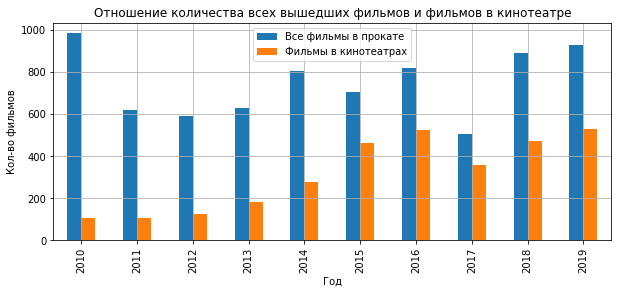

In [87]:
# В прокате (Кинотеатр)
cnt_cinema_screenings = data.groupby('year_show')['box_office'].count().to_frame() # Кол-во фильмов в прокате по годам
cnt_cinema_screenings.rename(columns={'box_office':'cnt_show'}, inplace=True) # Переименовываем столбец 'box_office' на 'cnt_show'
# Все фильмы, которые выходили (в прокате и не в прокате)
all_cinema = data.groupby('year_show')['title'].count().to_frame()  # Общее кол-во фильмов по годам
all_cinema.rename(columns={'title':'all_cnt_cinema'}, inplace=True) # Переименовываем столбец 'title' на 'all_cnt_cinema'
# Объединяем
all_cinema['cnt_cinema_show']=cnt_cinema_screenings['cnt_show']
# Визуализируем
all_cinema.reset_index().plot(x='year_show', kind='bar', figsize = (10, 4), grid = True, title='Кол-во фильмов по годам')
plt.title('Отношение количества всех вышедших фильмов и фильмов в кинотеатре')
plt.xlabel('Год')
plt.ylabel('Кол-во фильмов')
plt.legend(['Все фильмы в прокате', 'Фильмы в кинотеатрах', 'Доля'])
plt.show()

In [88]:
# Подсчет доли по годам
all_cinema['percent_cinema_show'] = round((all_cinema['cnt_cinema_show'] / all_cinema['all_cnt_cinema']) *100, 2)
all_cinema

,all_cnt_cinema,cnt_cinema_show,percent_cinema_show
year_show,,,
2010,985,105,10.66
2011,622,109,17.52
2012,593,128,21.59
2013,630,184,29.21
2014,806,279,34.62
2015,705,465,65.96
2016,818,526,64.30
2017,505,357,70.69
2018,891,475,53.31


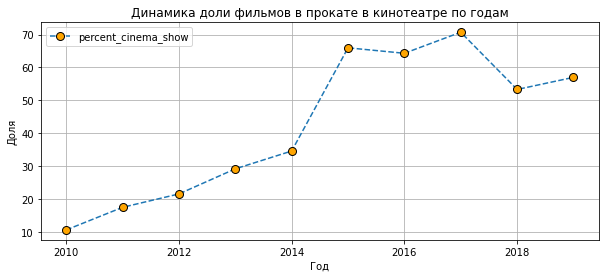

In [89]:
all_cinema.reset_index().plot(  
                                x='year_show', 
                                y='percent_cinema_show',
                                figsize = (10, 4),
                                grid = True, 
                                linestyle='--',
                                marker='o',
                                markerfacecolor='orange',
                                markeredgecolor='black',
                                markersize=8
                              )
plt.title('Динамика доли фильмов в прокате в кинотеатре по годам')
plt.xlabel('Год')
plt.ylabel('Доля')
plt.show()

#### Промежуточный вывод
<div class="alert alert-info"> 

`Общая доля фильмов с данными о прокате: 42.19%`

`'Отношение количества всех вышедших фильмов и фильмов в кинотеатре'`

Видим, что отношение всех вышедших фильмов к фильмам в кинотеатре носит отстающий характер. 

- Максимальное отставание в 2010 г. 
- Минимальное - в 2017 г.

`'Динамика доли фильмов в прокате в кинотеатре по годам'`

С 2010 по 2019 годы кол-во всех вышедших фильмов в прокат значительно выше, чем фильмов показанных в кинотеатрах. Это не удивительно.
Любопытно, что значительный рост кол-ва показов в кинотеатрах начинается с 2015 по 2016 и с 2018 по 2019. В 2017 году был некий провал, но не откат по кол-ву.

Зато доля фильмов в кинотеатрах в 2017 году больше остальных - 70.69%! 

Сравнивая два периода с 2015 по 2016 и с 2018 по 2019

Заметим, что доля фильмов в кинотеатрах:

с 2015 по 2016 больше (65.96 и 64.30), чем в период с 2018 по 2019 (53.31 и 56.99)

А вот кол-во всех выпущенных фильмов имеет обратную картину:

с 2015 по 2016 меньше (705 и 818), чем в период с 2018 по 2019 (891 и 930)

О чем это может говорить:

В 2017 что-то произошло, какой-то фактор заставил сменить вектор киноиндустрии и искать точку сбыта (просмотров). Так как (рассматривая период с 2015 г) сначала наблюдался кол-ый рост всех фильмов и активный показ в кинотеатрах. Затем случился 2017 год. Выпустили фильмов значительно меньше, а вот в кинотеатрах их стали показывать значительно чаще (70.69). Затем в 2018 г снова рост всех фильмов, но снижение доли показов в кино.


### Изучим динамику проката по годам

In [90]:
# Посмотрим в каком году сумма сборов была минимальной и максимальной
table = data.pivot_table(index = 'year_show', values = 'box_office', aggfunc = ['sum', 'count'])
table.columns = ['sum', 'count']
table

,sum,count
year_show,,
2010,1.9,105
2011,13.9,109
2012,6.2,128
2013,28.6,184
2014,7444.1,279
2015,39498.9,465
2016,47867.3,526
2017,48564.1,357
2018,49667.5,475


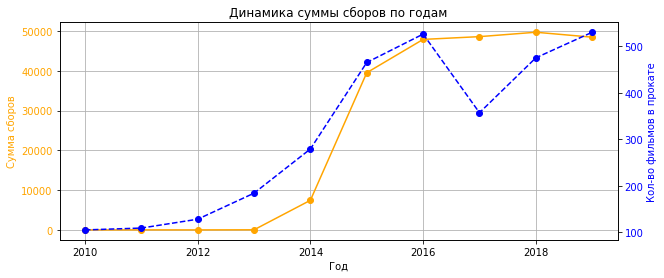

In [91]:
# Визуализируем данные о динамике сборов по годам
fig, ax1 = plt.subplots(figsize=(10, 4))
# Описываем визуализацию суммы сборов
ax1.grid()
ax1.set_xlabel('Год')
ax1.set_ylabel('Сумма сборов', color = 'orange')
ax1.plot(table['sum'], linestyle='-', marker='o', color='orange',markersize=6)
ax1.tick_params(axis ='y', labelcolor = 'orange')
ax2 = ax1.twinx()
# Описываем визуализацию Кол-ва фильмов в прокате
ax2.set_ylabel('Кол-во фильмов в прокате', color = 'blue')
ax2.plot(table['count'], linestyle='--', marker='o', color='blue',markersize=6)
ax2.tick_params(axis ='y', labelcolor = 'blue')

plt.title('Динамика суммы сборов по годам')
plt.show()


In [92]:
# Посмотрим среднюю и медианную сумму сборов для каждого года
pivot = data.pivot_table(index = 'year_show', values = 'box_office', aggfunc = ['median','mean'])
pivot.columns = ['median','mean']
pivot

,median,mean
year_show,,
2010,0.00,0.018095
2011,0.00,0.127523
2012,0.00,0.048437
2013,0.00,0.155435
2014,0.00,26.681362
2015,4.90,84.943871
2016,3.85,91.002471
2017,10.00,136.033894
2018,8.90,104.563158


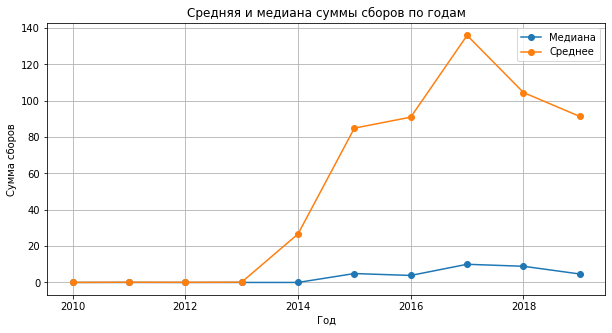

In [93]:
# Визуализируем данные о динамике средней и медианной суммы сборов
pivot = data.pivot_table(index='year_show', values='box_office', aggfunc =['median','mean'])
pivot.plot(
            title = 'Cредняя и медиана суммы сборов по годам',
            y = ['median', 'mean'],
            kind = 'line', 
            style='o-', 
            grid = True, figsize=(10, 5)
          )
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.legend(['Медиана', 'Среднее'])
plt.show()

#### Промежуточный вывод
<div class="alert alert-info"> 

`В 2010 году сумма сборов была минимальной, в 2018 максимальной`

`'Динамика суммы сборов по годам'`
С 2013 по 2016 сумма сборов плавно растет, далее - плато и небольшой спад. Заметим, что в 2017 году фильмов меньше, но сумма сборов не падает

`'Cредняя и медиана суммы сборов по годам'`
С 2013 года средняя сумма сдвинулась с мертвой точки и начала подрастать. В 2017 году сумма достигает своего пика, похожего на всплеск, далее - снижается. Медиана выглядит уныло, но стабильно. До 2014 года она стабильно лежит у нуля, а вот с 2014 начинает колебаться в пределах 10 млн.р.

### Определим влияния возрастной категории на сборы фильмов в прокате в период с 2015 по 2019 год

In [94]:
# 1.Посмотрим зависимость суммы сборов от возрастного ограничения 

# Сократим название значений для удобства
data['age_restriction'] = data['age_restriction'].str[:5]
data['age_restriction'] = data['age_restriction'].str.strip()

# Выделяем период
year_15_19 =  data[data['year_show'] >= 2015]

# Смотрим фильмы с каким возрастным ограничением собрали больше всего денег в прокате
age_box_15_19 = year_15_19.groupby('age_restriction')['box_office'].sum().to_frame() 
age_box_15_19

,box_office
age_restriction,
«0+»,809.3
«12+»,60619.3
«16+»,76037.6
«18+»,40759.3
«6+»,55798.7


In [95]:
# Вдогонку делаем разбивку по годам
age_year_15_19 = year_15_19.pivot_table(
                                        index='year_show',
                                        columns='age_restriction',
                                        values='box_office',
                                        aggfunc='sum')
age_year_15_19

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
year_show,,,,,
2015,379.1,13616.6,11368.9,5432.7,8701.6
2016,150.3,12204.0,16665.5,6794.3,12053.2
2017,229.6,7851.5,18745.7,9651.2,12086.1
2018,32.5,14266.9,16503.9,8759.2,10105.0
2019,17.8,12680.3,12753.6,10121.9,12852.8


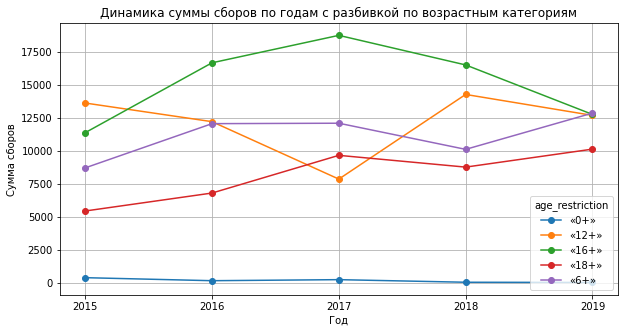

In [96]:
# Посмотрим распределение по годам 
age_year_15_19.plot(
                    figsize = (10, 5), 
                    grid = True, 
                    style = 'o-'
                    )
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.title('Динамика суммы сборов по годам с разбивкой по возрастным категориям')
plt.xticks(range(2015,2020));

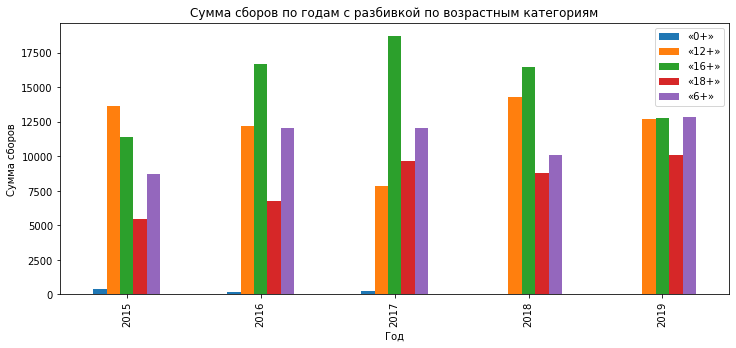

In [97]:
# Посмотрим как изменяется сумма сборов в каждой возрастной категории по годам
age_year_15_19.plot(
                    kind = 'bar', 
                    figsize = (12, 5)
                    )
plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.title('Cумма сборов по годам с разбивкой по возрастным категориям')
plt.legend(loc = 'upper right');

#### Промежуточный вывод
<div class="alert alert-info"> 

В период с 2015 по 2019 год наибольшая сумма сборов у фильмов категории «16+». Наименьшая - «0+».

`'Динамика суммы сборов по годам с разбивкой по возрастным категориям'` 

В разбивке по годам и возрастным категориям видим:

Возрастная категория «0+» во всем периоде собирает крайне мало, в сравнении с любыми другими (даже за один год).

Возрастная категория «6+» уверенный такой среднечок, который на протяжении всего периода меньше, чем в 2015 году не собирал.

Возрастная категория «12+» удивляющая в 2017 году - когда все остальные категории увеличили сборы в этом году, у нее произошел резкий спад.

Возрастная категория «16+» лидирующая категория со своим взлетом в 2017 году. Даже спад в 2018 и 2019 годах не повлиял на ее звание.

Возрастная категория «18+» в отстающих, но непобежденных. Не смотря на небольшой спад в 2018 году, медленно, но верно сумма сборов растет.

`'Cумма сборов по годам с разбивкой по возрастным категориям'`

**Видим, что в 2015 году:**

Лидирующую позицию занимала категория «12+»

На втором месте - «16+»

Наш среднечок - «6+»

В отстоющих - «18+»

И совсем не интересующихся - «0+»

**в 2016 году:**

Лидирующую позицию заняла категория «16+» (и не покидала ее вплоть до 2019 года)

А категории «6+» и «12+» почти сравнялись

**в 2017 году:**

Абсолютный чемпион - категория «16+»

**а вот с 2018 по 2019 г:**

Сборы по категориям начинают выравниваться

Картина меняеся в зависимости от года. Это может быть связано с многими причинами:

- Начали активно развиваться онлайн-кинотеатры
- Вводились законодательные новшества
- Экономическая ситуация в стране
- Финансирование со сороны государства
- Цензура

В общем и целом, все что угодно. Нужно посмотреть/покрутить данные с другими параметрами.

## <span style="color:orange"> Исследование фильмов с господдержкой

In [98]:
# Посмотрим какая доля фильмов получает господдерку 
all_films=data[data['first_production_country'] == 'Россия'] # Все фильмы
support=data[data['refundable_support'] >= 0] # Фильмы с господдержкой
#zall_films_cnt = len(support)
support_cnt=round(len(support) / len(all_films) * 100,2 )
print(f'Общее кол-во фильмов: {len(all_films)}')

print(f'Кол-во фильмов, которые получают господдержку: {len(support)}')
print(f'Доля получивших господдержку:{support_cnt} %')

Общее кол-во фильмов: 1913
Кол-во фильмов, которые получают господдержку: 332
Доля получивших господдержку:17.35 %


In [99]:
# Добавим еще две столбика
support['all_support'] = support['refundable_support'] + support['nonrefundable_support'] # Весь объем господдержки
support['support_payback'] = (support['box_office'] / support['all_support']) > 1 # превысили объем господдержки
support['budget_payback'] = (support['box_office'] / support['budget']) > 1 # превысили объем бюджета

/tmp/ipykernel_221/4160769448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support['all_support'] = support['refundable_support'] + support['nonrefundable_support'] # Весь объем господдержки
/tmp/ipykernel_221/4160769448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  support['support_payback'] = (support['box_office'] / support['all_support']) > 1 # превысили объем господдержки
/tmp/ipykernel_221/4160769448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

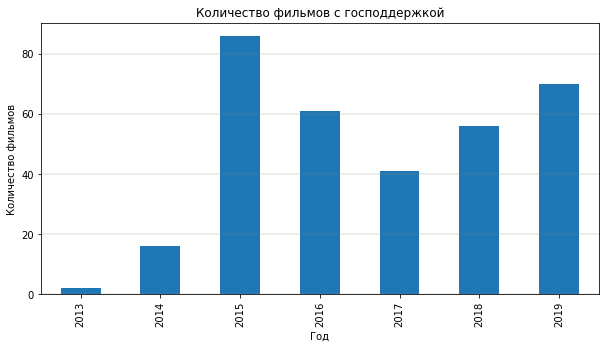

In [100]:
# Посмотрим количество фильмов с господдержкой
supported_cnt = support.pivot_table(index='year_show', values='pu_number', aggfunc='count')
supported_cnt.plot(kind='bar', legend=False, figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=0.30, axis='y')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов с господдержкой');

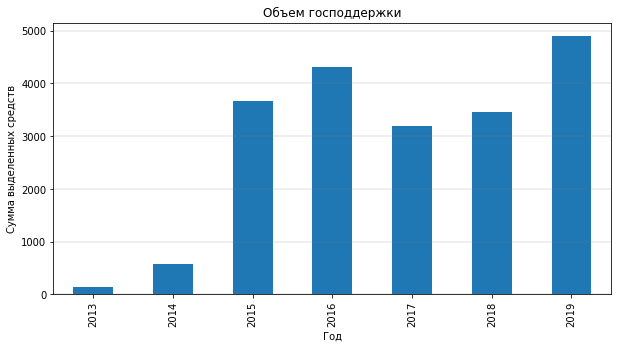

In [101]:
# Посмотрим объем господдержки
support_cnt = support.pivot_table(index='year_show', values='all_support', aggfunc='sum')
support_cnt.plot(kind='bar', legend=False, figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=0.25, axis='y')
plt.xlabel('Год')
plt.ylabel('Сумма выделенных средств')
plt.title('Объем господдержки');

In [102]:
years = sorted(list(support['year_show'].unique()))
support_films = {}
for y in sorted(support['year_show'].unique()):
    support_films[y] = [support.loc[(support['year_show'] == y) & (support['budget_payback'] == False), 'year_show'].count(), \
                            support.loc[(support['year_show'] == y) & (support['budget_payback'] == True), 'year_show'].count()]                       
support_films_cnt = {
                        'Не окупились': np.array([i[0] for i in list(support_films.values())]),
                        'Окупились': np.array([i[1] for i in list(support_films.values())]),
                    }

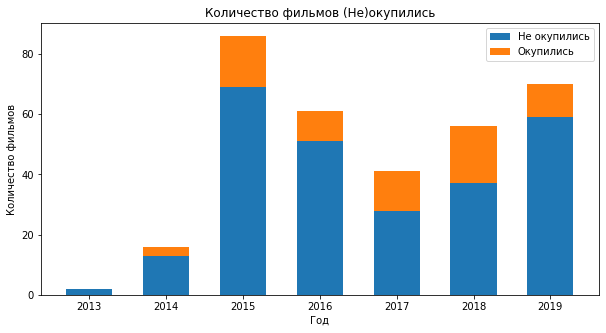

In [103]:
fig, ax = plt.subplots(figsize=(10, 5))
bottom = np.zeros(len(years))
width = 0.6
for year, film_count in support_films_cnt.items():
    p = ax.bar(years, film_count, width, label=year, bottom=bottom)
    bottom += film_count
    #ax.bar_label(p, label_type='center')
ax.set_title('Количество фильмов (Не)окупились')
ax.legend()
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.show()

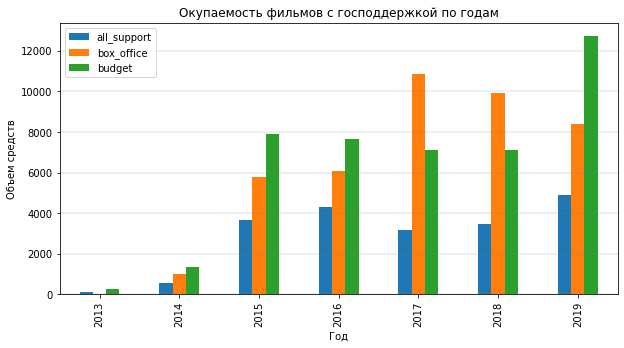

In [104]:
# Посмотрим окупаемость фильмов с господдержкой по годам
support.pivot_table(index='year_show', values=['box_office', 'all_support', 'budget'], aggfunc='sum').plot(kind='bar', figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=0.25, axis = 'y')
plt.xlabel('Год')
plt.ylabel('Объем средств')
plt.title('Окупаемость фильмов с господдержкой по годам');

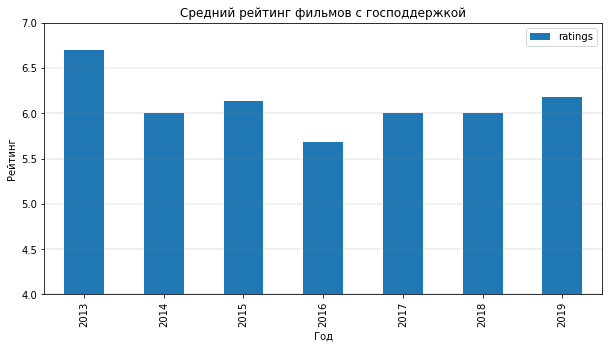

In [105]:
# Средний рейтинг фильмов с господдержкой
support.pivot_table(index='year_show', values='ratings', aggfunc='mean').plot(title='Средний рейтинг фильмов с господдержкой', kind='bar', figsize=(10, 5))
plt.grid(color='grey', linestyle='-', linewidth=0.25, axis='y')
plt.ylim([4,7])
plt.legend(loc = 'upper right')
plt.xlabel('Год')
plt.ylabel('Рейтинг')
plt.title('Средний рейтинг фильмов с господдержкой');

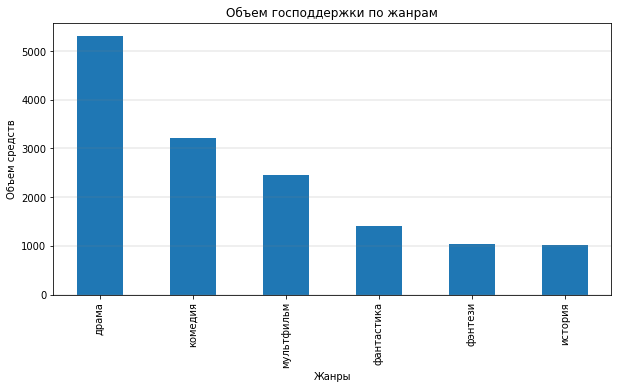

In [106]:
# Посмотрим объем господдержки по жанрам
(support
         .pivot_table(index='first_genres', values='all_support', aggfunc='sum')
         .sort_values(by='all_support', ascending=False)
         .head(6)
         .plot(kind='bar', legend=False, figsize=(10, 5))
)
plt.grid(color='grey', linestyle='-', linewidth=0.25, axis = 'y')
plt.xlabel('Жанры')
plt.ylabel('Объем средств')
plt.title('Объем господдержки по жанрам');

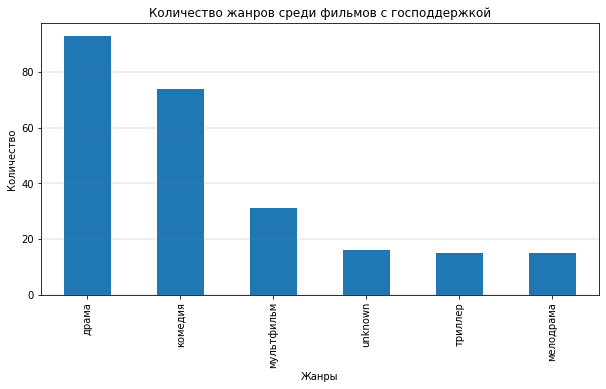

In [107]:
# Посмотрим количество жанров среди фильмов с господдержкой
(support
        .pivot_table(index='first_genres', values='pu_number', aggfunc='count')
        .sort_values(by='pu_number', ascending=False)
        .head(6)
         .plot(kind='bar', legend=False, figsize=(10, 5))
)

plt.grid(color='grey', linestyle='-', linewidth=0.25, axis = 'y')
plt.xlabel('Жанры')
plt.ylabel('Количество')
plt.title('Количество жанров среди фильмов с господдержкой');

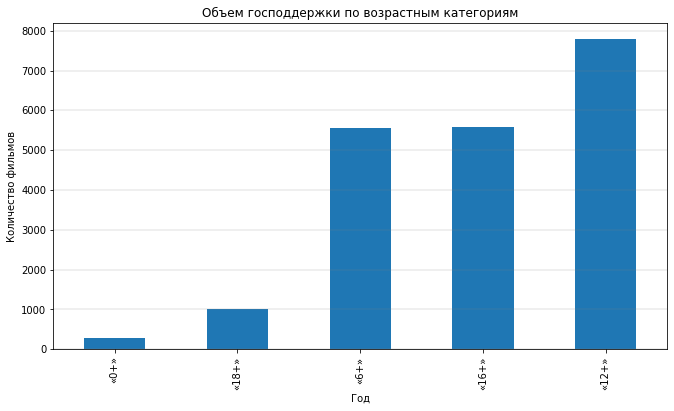

In [108]:
# Посмотрим объем господдержки по возрастным категориям
support_age = support.pivot_table(index='age_restriction', values='all_support', aggfunc='sum').sort_values(by='all_support')
support_age.plot(kind='bar', legend=False, figsize=(11, 6))
plt.grid(color='grey', linestyle='-', linewidth=0.25, axis='y')
plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Объем господдержки по возрастным категориям');

## <span style="color:orange"> 5.Общий вывод

<div style="border:solid Orange 2px; padding: 15px">
    
<span style="color:orange">ОБЩАЯ ИНФОРМАЦИЯ

Часть колонок описывает сам фильм: 
- Номер прокатного удостоверения, название, дата премьеры, тип, студия-производ тель, страна производитель, режиссер, продюссер, возрастная категория, рейтинг фильма на Кинопоиске, жанр. 

Остальные данные рассказывают о финансовой стороне: 
- Объем возвратных средств, объем невозвратных средств, сборы в рублях, общий бюджет фильма (сумма возвратных, невозвратных и средства из иных источников).

Всего таблица содержит данные о 7485 фильмов (строк), описание которых состоит из 16 столбцов.

- Объединили 2 файла с даннымии по уникальному номеру прокатного удостоверения
- Название колоноки `'puNumber'` заменили на `'pu_number'` и изменили тип на целочисленный

<span style="color:orange">ПРЕДОРАБОТКА
1. **Преобразование типов данных:**
- Сменили тип в столбцах `show_start_date` на datetime т.к. это дата
- Сменили тип в столбце `ratings на float` т.к. это дробное число
- Привели в общий вид значения столбца `'ratings'`

2. **Работа с пропусками:**

<span style="color:red"> **Исходный процент пропусков составил 29.6%** 
 
*Основной объем пропусков в исходных данных приходился на количественные значения:*

`'financing_source', 'budget', 'nonrefundable_support', 'refundable_support' по 95.6% и 'box_office' - 57.8%`

- В столбце `'production_country'` проставили значения "Россия"
- Заменили пропущенные значения на `'unknown'` в столбцах `'genres'`, `'producer'`, `'film_studio'`, `'director'`, `'financing_source'`
- В столбце `'budget'` заменили нулевые значения

 **Таким образом, `Средний процент пропусков уменьшился до 21%` (промежуточный результат)**

3. **Работа с дубликатами:**

- Явных дубликатов не обнаружено
- Найдено 4 дубликата в столбце с проканым удостоверением 
- Заменили прокатное удостоверение на свободное

**Работа с категориальными значениями:**

*Общие проблемы:*
- Лишние пробелы и знаки
- Ошибки в названиях
- Неявные дубликаты
- Нарушения общего стиля

*Общая особенность:*
- В одном столбце может быть указано несколько категорий (например, у фильм могут быть несколько стран). Из-за этого возникает большое кол-во категорий, что усложняет сортировку и дальнейшую работу.

*Основные устраненные проблемы:*
- Убрали лишние пробелы/Заменили(удалили) знаки припенания
- Привели к единым названиям, так сократили кол-во дублей
- Заменили некорректное значения
- Поправили ошибки/опечатки
- Приведели к единому написанию аббревиатур

*Результаты по каждому столбцу:*

- 'production_country'

`Кол-во уникальных значений ДО: 934`

`Кол-во уникальных значений ПОСЛЕ: 796`

`Кол-во уникальных значений ФИНАЛЬНОЕ: 75`

- 'film_studio'

`Кол-во уникальных значений ДО: 5484`

`Кол-во уникальных значений ПОСЛЕ: 3958`

- 'director'

`Кол-во уникальных значений ДО: 4802`

`Кол-во уникальных значений ПОСЛЕ: 4603`

- 'producer'

`Кол-во уникальных ДО: 5344`

`Кол-во уникальных ПОСЛЕ: 4024`

- 'genres'

`Кол-во уникальных значений ДО: 743`

`Кол-во уникальных ФИНАЛЬНОЕ: 29`

**Работа с количественными значениями:**

- В столбцах `refundable_support`, `nonrefundable_support` и `budget` аномалий в данных не выявлено

*Подозрительные данные:* 

- В столбце `'box_office'`

У 231 фильмов сборы составили менее 1000 рублей. Это выглядит как ошибка, потому что сборы по этим работам крупненькие (например, "Кунг-фу Панда 3"). 
Возможно, что единица исчислений в этих значениях т.р / млн.р. или в валюте!

<span style="color:green">**Средний процент пропусков уменьшился до 16.2%**

**Добавили новые столбцы со следующей информацией:**

- Создали столбец с информацией о годе проката фильма `'year_show'`
- Главный режиссер `'first_director'`
- Основной жанр фильма `'first_genres'`
- Основная страна производства `'first_production_country'`

Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка:

- `'percent_support'` - общий процент

- `'percent_refundable_support'` - процент возвратных средств

- `'percent_nonrefundable_support'` - процент невозвраных средств


<span style="color:orange">ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ

1. Посмотрели сколько фильмов выходило в прокат каждый год
   
`Общая доля фильмов с данными о прокате: 42.19%`

`'Отношение количества всех вышедших фильмов и фильмов в кинотеатре'`

Видим, что отношение всех вышедших фильмов к фильмам в кинотеатре носит отстающий характер. Максимальное отставание в 2010 г. Минимальное - в 2017 г.

`'Динамика доли фильмов в прокате в кинотеатре по годам'`

С 2010 по 2019 годы кол-во всех вышедших фильмов в прокат значительно выше, чем фильмов показанных в кинотеатрах. Это не удивительно.
Любопытно, что значительный рост кол-ва показов в кинотеатрах начинается с 2015 по 2016 и с 2018 по 2019. В 2017 году был некий провал, но не откат по кол-ву.

Зато доля фильмов в кинотеатрах в 2017 году больше остальных - 70.69%! 

Сравнивая два периода с 2015 по 2016 и с 2018 по 2019

Заметим, что доля фильмов в кинотеатрах:

с 2015 по 2016 больше (65.96 и 64.30), чем в период с 2018 по 2019 (53.31 и 56.99)

А вот кол-во всех выпущенных фильмов имеет обратную картину:

с 2015 по 2016 меньше (705 и 818), чем в период с 2018 по 2019 (891 и 930)

О чем это может говорить:

В 2017 что-то произошло, какой-то фактор заставил сменить вектор киноиндустрии и искать точку сбыта (просмотров). Так как (рассматривая период с 2015 г) сначала наблюдался кол-ый рост всех фильмов и активный показ в кинотеатрах. Затем случился 2017 год. Выпустили фильмов значительно меньше, а вот в кинотеатрах их стали показывать значительно чаще (70.69). Затем в 2018 г снова рост всех фильмов, но снижение доли показов в кино.

2. Изучили динамику проката по годам

`В 2010 году сумма сборов была минимальной, в 2018 максимальной`

`'Динамика суммы сборов по годам'`
С 2013 по 2016 сумма сборов плавно растет, далее - плато и небольшой спад. Заметим, что в 2017 году фильмов меньше, но сумма сборов не падает

`'Cредняя и медиана суммы сборов по годам'`
С 2013 года средняя сумма сдвинулась с мертвой точки и начала подрастать. В 2017 году сумма достигает своего пика, похожего на всплеск, далее - снижается. Медиана выглядит уныло, но стабильно. До 2014 года она стабильно лежит у нуля, а вот с 2014 начинает колебаться в пределах 10 млн.р.

3. Определили влияние возрастной категории на сборы фильмов в прокате в период с 2015 по 2019 год

В период с 2015 по 2019 год наибольшая сумма сборов у фильмов категории «16+». Наименьшая - «0+».

`'Динамика суммы сборов по годам с разбивкой по возрастным категориям'` 

В разбивке по годам и возрастным категориям видим:

Возрастная категория «0+» во всем периоде собирает крайне мало, в сравнении с любыми другими (даже за один год).

Возрастная категория «6+» уверенный такой среднечок, который на протяжении всего периода меньше, чем в 2015 году не собирал.

Возрастная категория «12+» удивляющая в 2017 году - когда все остальные категории увеличили сборы в этом году, у нее произошел резкий спад.

Возрастная категория «16+» лидирующая категория со своим взлетом в 2017 году. Даже спад в 2018 и 2019 годах не повлиял на ее звание.

Возрастная категория «18+» в отстающих, но непобежденных. Не смотря на небольшой спад в 2018 году, медленно, но верно сумма сборов растет.

`'Cумма сборов по годам с разбивкой по возрастным категориям'`

**Видим, что в 2015 году:**

Лидирующую позицию занимала категория «12+»

На втором месте - «16+»

Наш среднечок - «6+»

В отстоющих - «18+»

И совсем не интересующихся - «0+»

**в 2016 году:**

Лидирующую позицию заняла категория «16+» (и не покидала ее вплоть до 2019 года)

А категории «6+» и «12+» почти сравнялись

**в 2017 году:**

Абсолютный чемпион - категория «16+»

**а вот с 2018 по 2019 г:**

Сборы по категориям начинают выравниваться

Картина меняеся в зависимости от года. Это может быть связано с многими причинами:

- Начали активно развиваться онлайн-кинотеатры
- Вводились законодательные новшества
- Экономическая ситуация в стране
- Финансирование со сороны государства
- Цензура

<span style="color:orange"> ИССЛЕДОВАНИЕ ФИЛЬМОВ С ГОСПОДДЕРЖКОЙ

- Общее кол-во фильмов: 1913
- Кол-во фильмов, которые получают господдержку: 332
- Доля получивших господдержку:17.35 %

`'Количество фильмов с господдержкой'`

- С 2015 по 2017 год количество фильмов, с господдержкой уменьшалось в 2 раза 
- С 2017 по 2019 год заметен рост 

`'Объем господдержки'`

- Сумма выделенных средств в 2015 и 2019 г наибольшая


`'Количество фильмов (Не)окупились'`

- Год, в который наибольшее кол-во окупаемых фильмов в этом плане год - 2018. Самый худший - 2013.

`'Окупаемость фильмов с господдержкой по годам'`

- Объем кассовых сборов во все годы превышает объем выделенных государством средств.
- Фильмы с господдержкой показывают невысокий средний рейтинг. Средний рейнинг фильмов не привышает 6.6.
- Чаще всего государство спонсирует фильмы в категории "16+" и "12+", реже всего - в категории "0+".
- Три самых популярных жанра фильмов - драма, комедия мультфильм